## **Healthcare_project**

**Problem Statement:**

ABC is a pharmaceutical company keen on understanding persistency of a drug based on
physician prescriptions for patients. To tackle this, ABC has engaged an analytics company to
automate the identification of persistency. This analytics firm has tasked Team Data Minders
with creating an automated solution to evaluate and enhance the persistency of a drug for ABC.

**ML Problem:**

With an objective to gather insights on the factors that are impacting the persistency, build a classification for the given dataset.

Target Variable: Persistency_Flag

# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier




pd.set_option('display.max_columns', None)


In [ ]:
!pip install phik

In [ ]:
import phik
from phik import resources, report

# Constants

In [ ]:
RANDOM_STATE = 42

# **Loading data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd  /content/drive/MyDrive/datasets/healthcare/

/content/drive/MyDrive/datasets/healthcare


In [ ]:
healthcare_file_path = 'healthcare_dataset.xlsx'

In [ ]:
xls = pd.ExcelFile(healthcare_file_path)
df= pd.read_excel(xls, 'Dataset')


# **Data Understanding**

In [ ]:
df.head()

Ptid Persistency_Flag  Gender           Race     Ethnicity   Region  \
0   P1       Persistent    Male      Caucasian  Not Hispanic     West   
1   P2   Non-Persistent    Male          Asian  Not Hispanic     West   
2   P3   Non-Persistent  Female  Other/Unknown      Hispanic  Midwest   
3   P4   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
4   P5   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   

  Age_Bucket        Ntm_Speciality Ntm_Specialist_Flag  \
0        >75  GENERAL PRACTITIONER              Others   
1      55-65  GENERAL PRACTITIONER              Others   
2      65-75  GENERAL PRACTITIONER              Others   
3        >75  GENERAL PRACTITIONER              Others   
4        >75  GENERAL PRACTITIONER              Others   

       Ntm_Speciality_Bucket Gluco_Record_Prior_Ntm Gluco_Record_During_Rx  \
0  OB/GYN/Others/PCP/Unknown                      N                      N   
1  OB/GYN/Others/PCP/Unknown                      N                      N   
2  OB/GYN/Others/PCP/Unknown                      N                      N   
3  OB/GYN/Others/PCP/Unknown                      N                      Y   
4  OB/GYN/Others/PCP/Unknown                      Y                      Y   

   Dexa_Freq_During_Rx Dexa_During_Rx Frag_Frac_Prior_Ntm Frag_Frac_During_Rx  \
0                    0              N                   N                   N   
1                    0              N                   N                   N   
2                    0              N                   N                   N   
3                    0              N                   N                   N   
4                    0              N                   N                   N   

  Risk_Segment_Prior_Ntm Tscore_Bucket_Prior_Ntm Risk_Segment_During_Rx  \
0                 VLR_LR                   >-2.5                 VLR_LR   
1                 VLR_LR                   >-2.5                Unknown   
2                 HR_VHR                  <=-2.5                 HR_VHR   
3                 HR_VHR                   >-2.5                 HR_VHR   
4                 HR_VHR                  <=-2.5                Unknown   

  Tscore_Bucket_During_Rx Change_T_Score Change_Risk_Segment Adherent_Flag  \
0                  <=-2.5      No change             Unknown      Adherent   
1                 Unknown        Unknown             Unknown      Adherent   
2                  <=-2.5      No change           No change      Adherent   
3                  <=-2.5      No change           No change      Adherent   
4                 Unknown        Unknown             Unknown      Adherent   

  Idn_Indicator Injectable_Experience_During_Rx  \
0             N                               Y   
1             N                               Y   
2             N                               Y   
3             N                               Y   
4             N                               Y   

  Comorb_Encounter_For_Screening_For_Malignant_Neoplasms  \
0                                                  N       
1                                                  N       
2                                                  Y       
3                                                  N       
4                                                  Y       

  Comorb_Encounter_For_Immunization  \
0                                 Y   
1                                 N   
2                                 N   
3                                 Y   
4                                 Y   

  Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx  \
0                                                  Y                
1                                                  Y                
2                                                  Y                
3                                                  Y                
4                                                  Y                

  Comorb_Vitamin_D_D

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [ ]:
df.shape

(3424, 69)

In [ ]:
df.columns=[x.lower() for x in df.columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   ptid                                                                3424 non-null   object
 1   persistency_flag                                                    3424 non-null   object
 2   gender                                                              3424 non-null   object
 3   race                                                                3424 non-null   object
 4   ethnicity                                                           3424 non-null   object
 5   region                                                              3424 non-null   object
 6   age_bucket                                                          3424 non-null   object
 7   ntm_speciality          

In [ ]:
df.describe()

dexa_freq_during_rx  count_of_risks
count          3424.000000     3424.000000
mean              3.016063        1.239486
std               8.136545        1.094914
min               0.000000        0.000000
25%               0.000000        0.000000
50%               0.000000        1.000000
75%               3.000000        2.000000
max             146.000000        7.000000

In [ ]:
#distribution of categorical features
df.describe(include=['O'])

ptid persistency_flag  gender       race     ethnicity   region  \
count   3424             3424    3424       3424          3424     3424   
unique  3424                2       2          4             3        5   
top       P1   Non-Persistent  Female  Caucasian  Not Hispanic  Midwest   
freq       1             2135    3230       3148          3235     1383   

       age_bucket        ntm_speciality ntm_specialist_flag  \
count        3424                  3424                3424   
unique          4                    36                   2   
top           >75  GENERAL PRACTITIONER              Others   
freq         1439                  1535                2013   

            ntm_speciality_bucket gluco_record_prior_ntm  \
count                        3424                   3424   
unique                          3                      2   
top     OB/GYN/Others/PCP/Unknown                      N   
freq                         2104                   2619   

       gluco_record_during_rx dexa_during_rx frag_frac_prior_ntm  \
count                    3424           3424                3424   
unique                      2              2                   2   
top                         N              N                   N   
freq                     2522           2488                2872   

       frag_frac_during_rx risk_segment_prior_ntm tscore_bucket_prior_ntm  \
count                 3424                   3424                    3424   
unique                   2                      2                       2   
top                      N                 VLR_LR                   >-2.5   
freq                  3007                   1931                    1951   

       risk_segment_during_rx tscore_bucket_during_rx change_t_score  \
count                    3424                    3424           3424   
unique                      3                       3              4   
top                   Unknown                 Unknown      No change   
freq                     1497                    1497           1660   

       change_risk_segment adherent_flag idn_indicator  \
count                 3424          3424          3424   
unique                   4             2             2   
top                Unknown      Adherent             Y   
freq                  2229          3251          2557   

       injectable_experience_during_rx  \
count                             3424   
unique                               2   
top                                  Y   
freq                              3056   

       comorb_encounter_for_screening_for_malignant_neoplasms  \
count                                                3424       
unique                                                  2       
top                                                     N       
freq                                                 1891       

       comorb_encounter_for_immunization  \
count                               3424   
unique                                 2   
top                                    N   
freq                                1911   

       comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx  \
count                                                3424                
unique                                                  2                
top                                                     N                
freq                                                 2072                

       comorb_vitamin_d_deficiency  \
count                         3424   
unique                           2   
top                              N   
freq                          2331   

       comorb_other_joint_disorder_not_elsewhere_classified  \
count                                                3424     
unique                                                  2     
top                                                     N     
freq                                                 2425     



## **Missing values and dublicates**

In [ ]:
df.isnull().sum()

ptid                              0
persistency_flag                  0
gender                            0
race                              0
ethnicity                         0
                                 ..
risk_hysterectomy_oophorectomy    0
risk_estrogen_deficiency          0
risk_immobilization               0
risk_recurring_falls              0
count_of_risks                    0
Length: 69, dtype: int64

In [ ]:
duplicates = df[df.duplicated ()]
print(duplicates)

Empty DataFrame
Columns: [ptid, persistency_flag, gender, race, ethnicity, region, age_bucket, ntm_speciality, ntm_specialist_flag, ntm_speciality_bucket, gluco_record_prior_ntm, gluco_record_during_rx, dexa_freq_during_rx, dexa_during_rx, frag_frac_prior_ntm, frag_frac_during_rx, risk_segment_prior_ntm, tscore_bucket_prior_ntm, risk_segment_during_rx, tscore_bucket_during_rx, change_t_score, change_risk_segment, adherent_flag, idn_indicator, injectable_experience_during_rx, comorb_encounter_for_screening_for_malignant_neoplasms, comorb_encounter_for_immunization, comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx, comorb_vitamin_d_deficiency, comorb_other_joint_disorder_not_elsewhere_classified, comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx, comorb_long_term_current_drug_therapy, comorb_dorsalgia, comorb_personal_history_of_other_diseases_and_conditions, comorb_other_disorders_of_bone_density_and_structure, comorb_disorders_of_lipoprotein_metabolism_a

Outliers

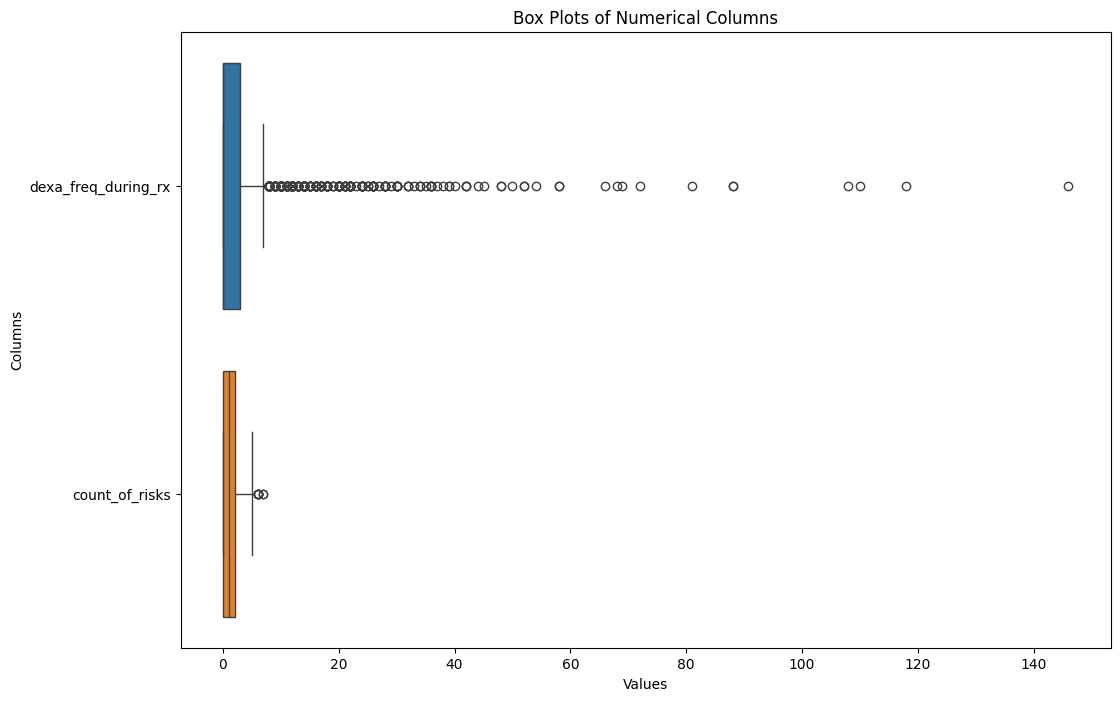

In [ ]:
# Creating a figure and axes
plt.figure(figsize=(12, 8))

# Selecting numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Creating a box plot for each numeric column
# 'h' for horizontal orientation
sns.boxplot(data=df[numeric_columns], orient='h')
plt.title('Box Plots of Numerical Columns')
plt.xlabel('Values')
plt.ylabel('Columns')

# Display the plot
plt.show()

In [ ]:
# Function to calculate outlier indices for a given column
def outlier_indices(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile (Q1)
    Q3 = data[column].quantile(0.75)  # Third quartile (Q3)
    IQR = Q3 - Q1  # Interquartile range (IQR)
    lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers
    # Returning indices of rows that contain outliers
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)].index

# Dictionary to store indices of outliers for each numeric column
outliers_dict = {}

# Identify and record outliers' indices for each numeric column
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    col_outliers = outlier_indices(df, col)
    if not col_outliers.empty:
        outliers_dict[col] = col_outliers

# Combine all outlier indices across columns
all_outlier_indices = set()
for indices in outliers_dict.values():
    all_outlier_indices.update(indices)

print("Original DataFrame size:", len(df))
# Remove all rows that have outliers in any numeric column
df = df.drop(index=all_outlier_indices)


print("New DataFrame size without outliers:", len(df))

Original DataFrame size: 3424
New DataFrame size without outliers: 2956


In [ ]:
df.shape

(2956, 69)

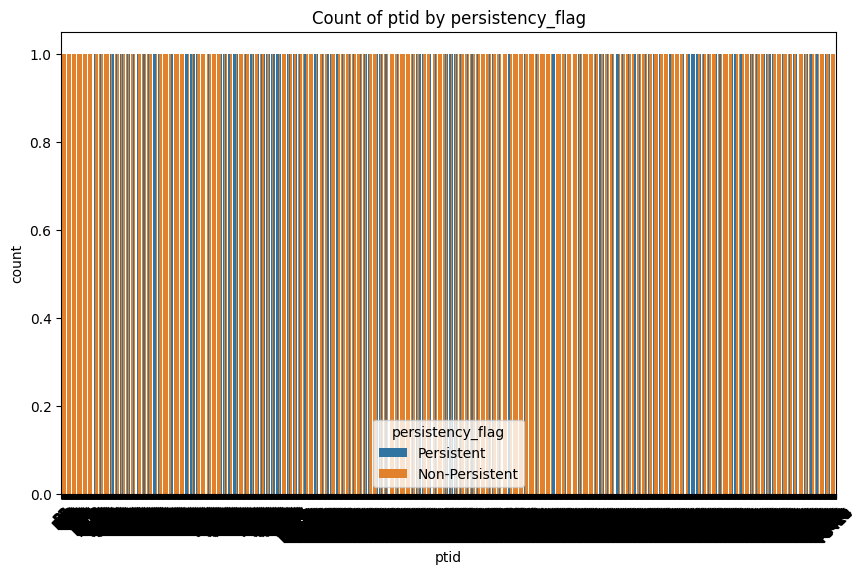

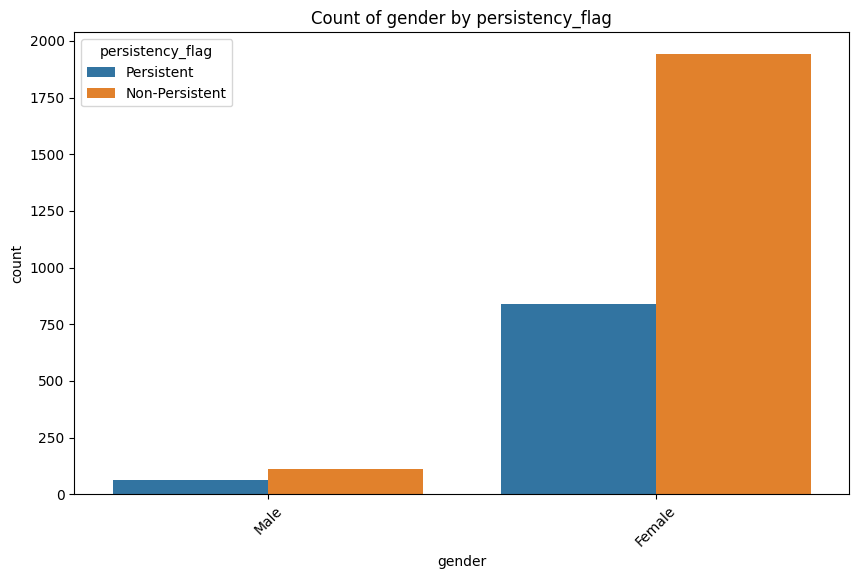

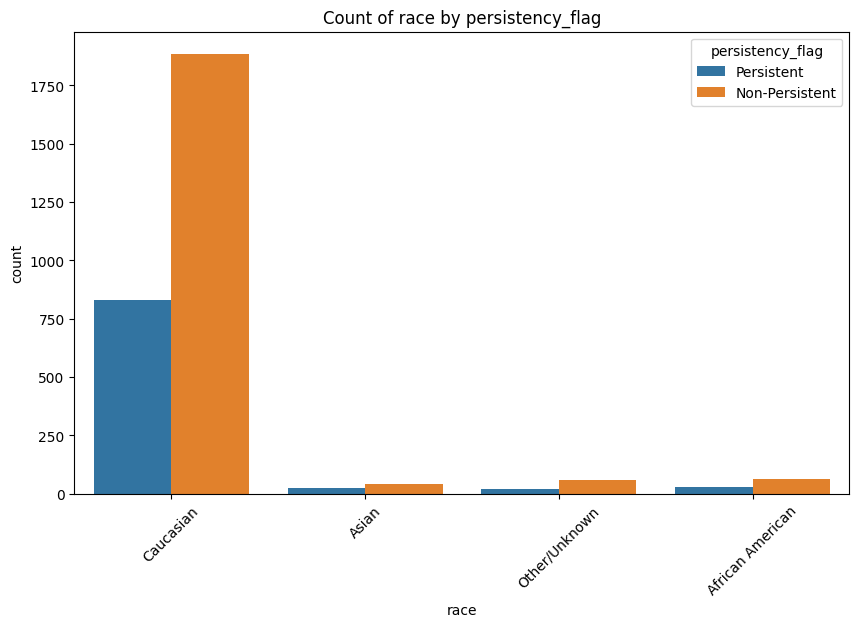

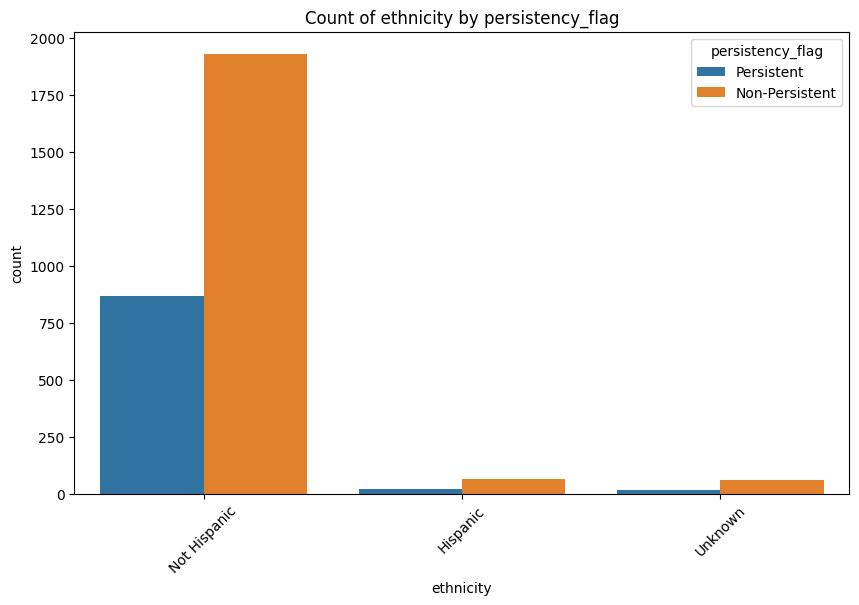

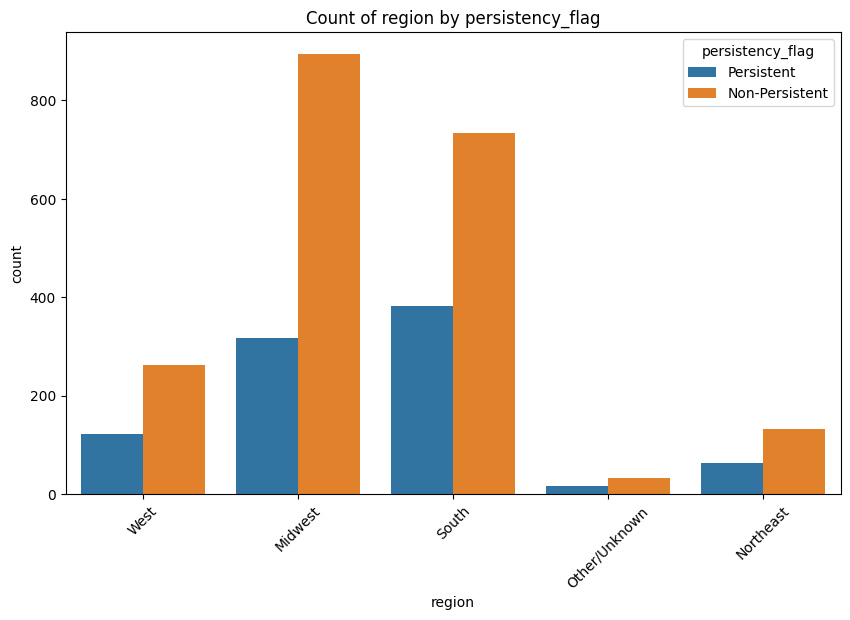

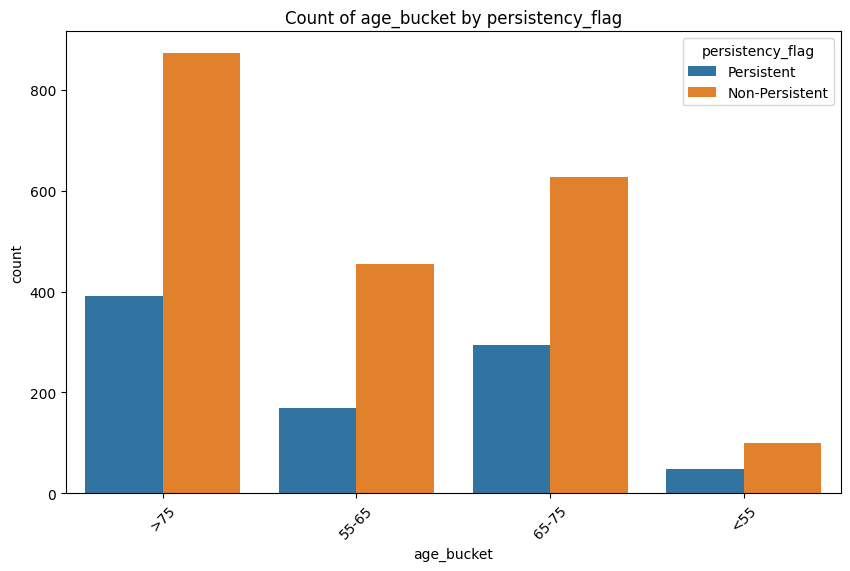

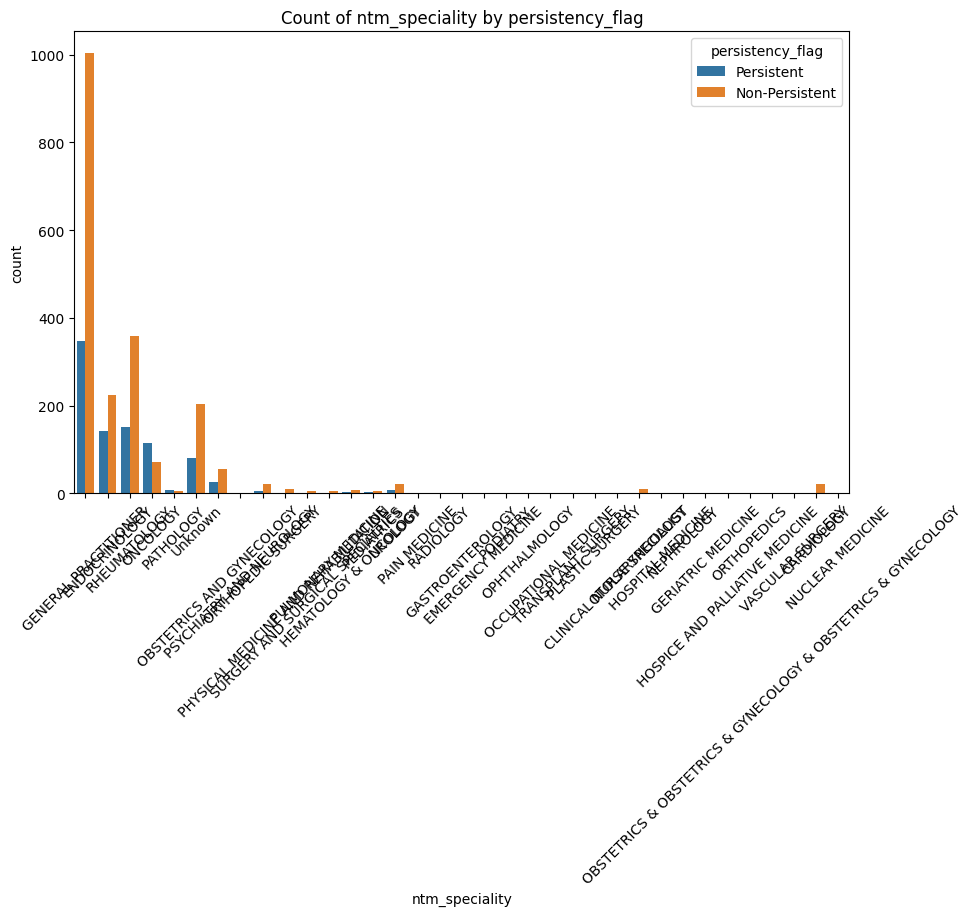

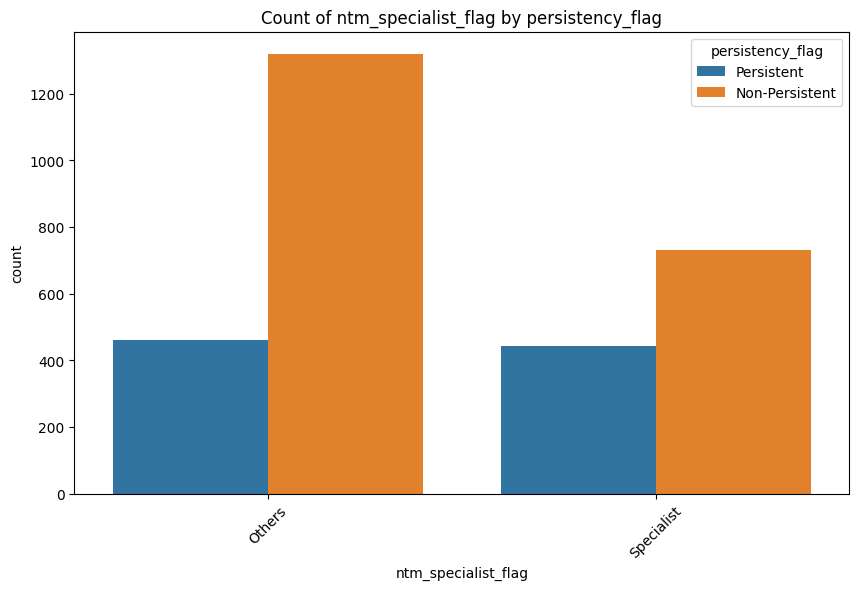

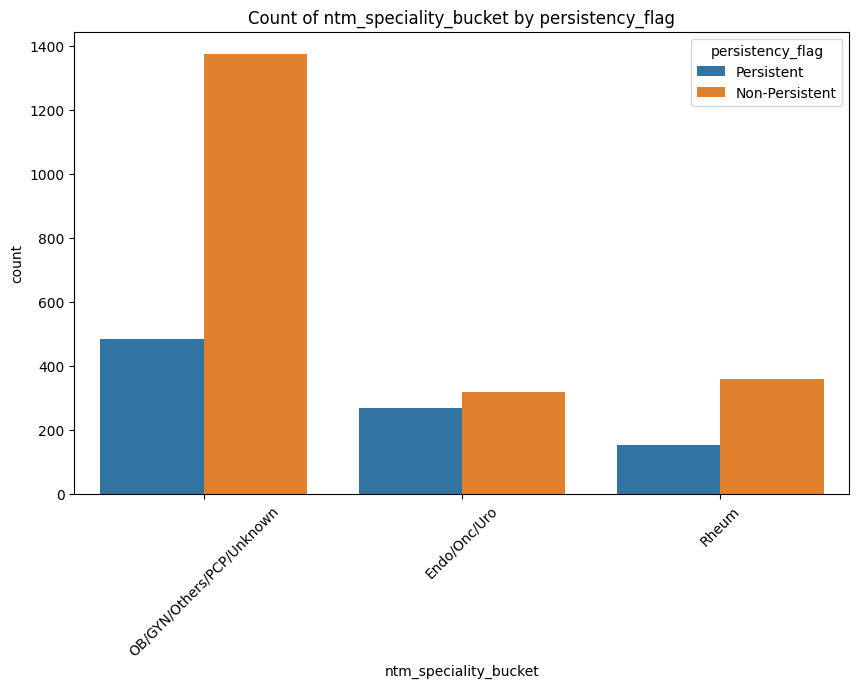

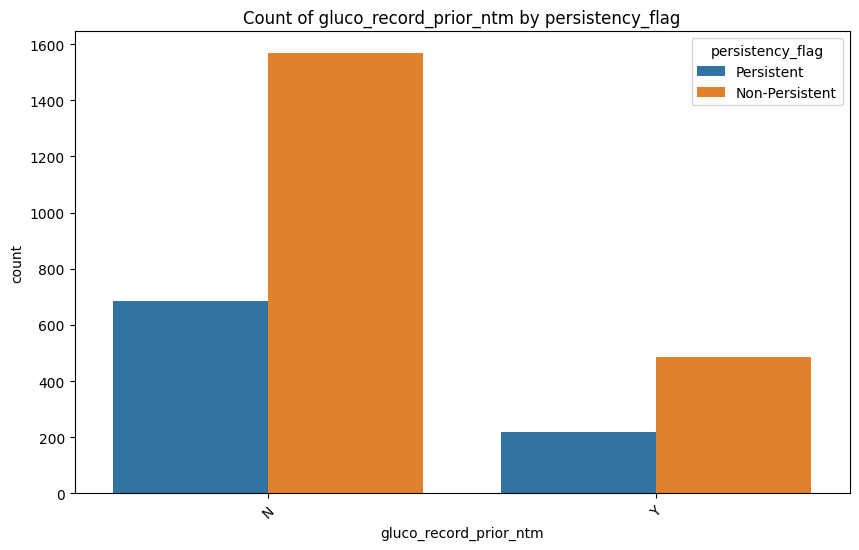

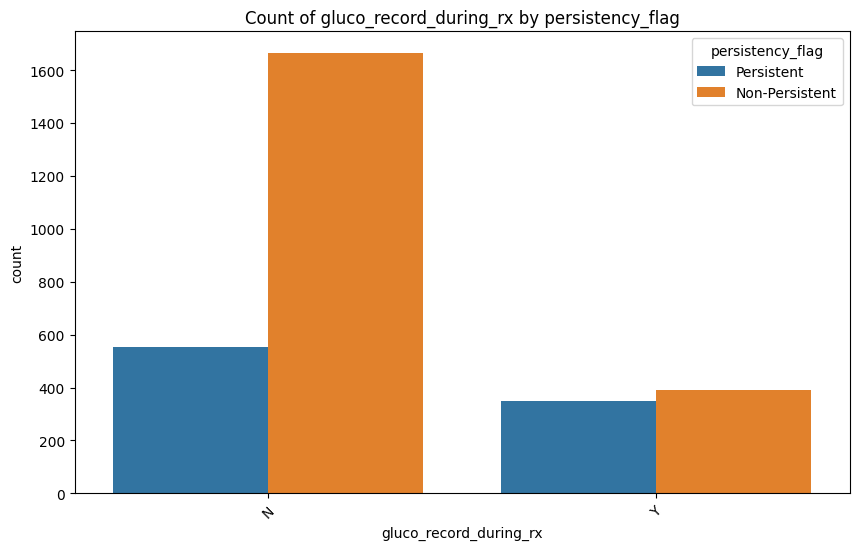

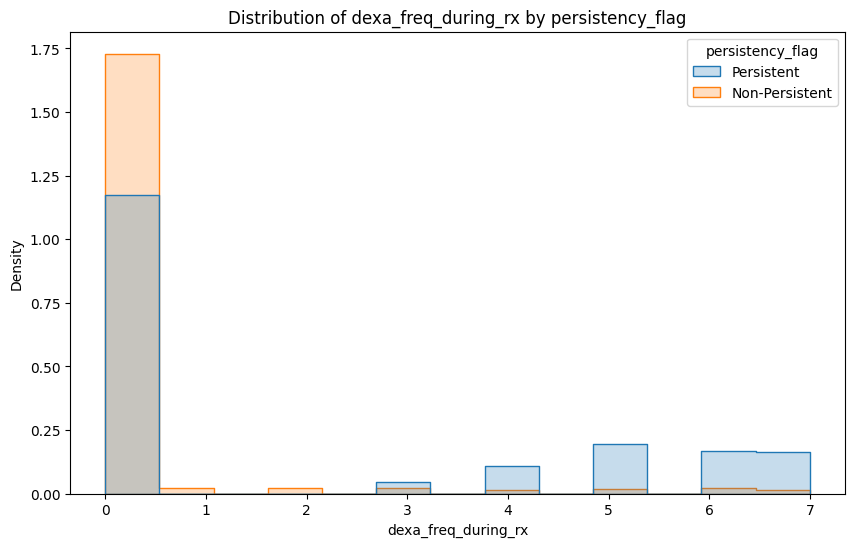

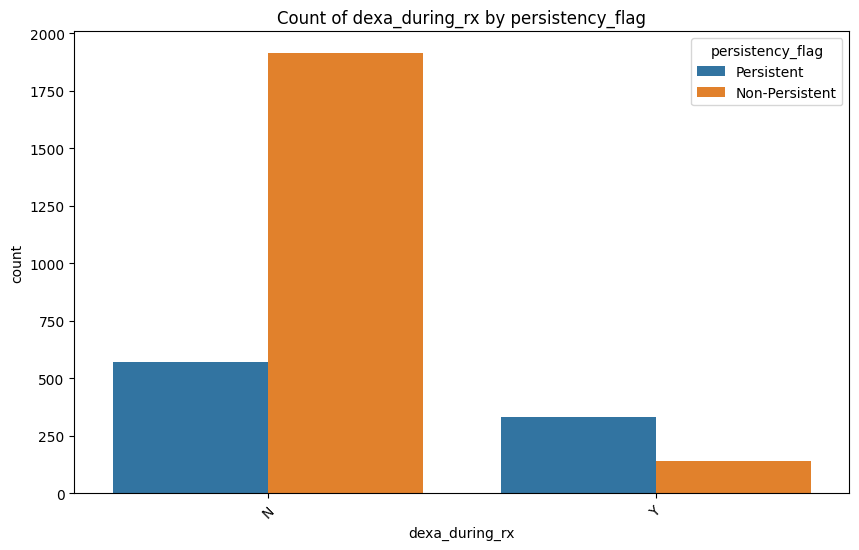

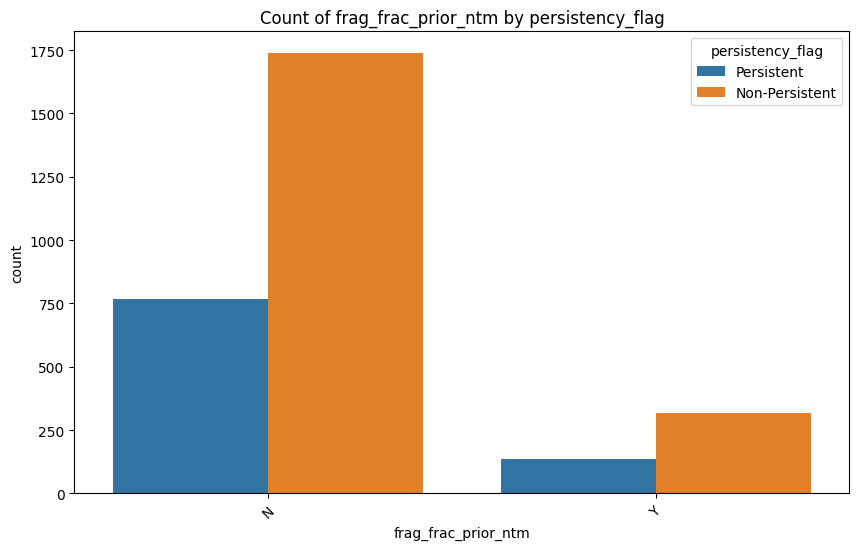

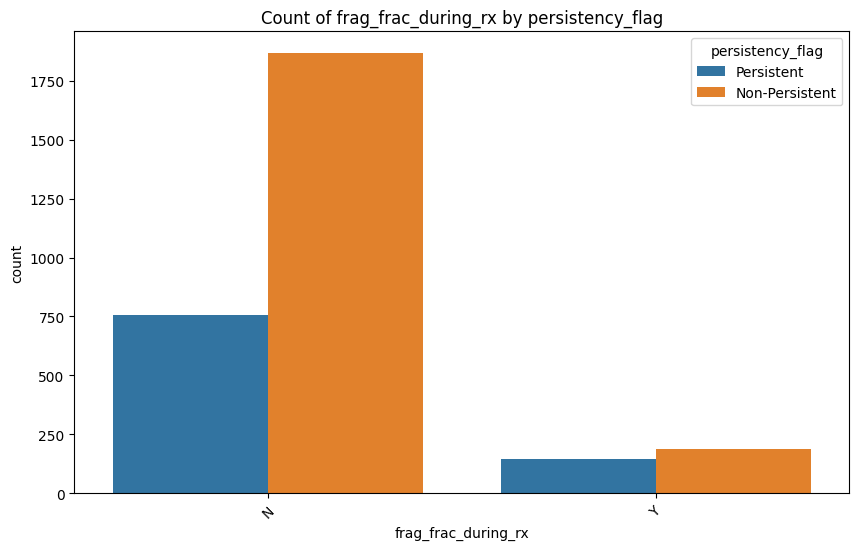

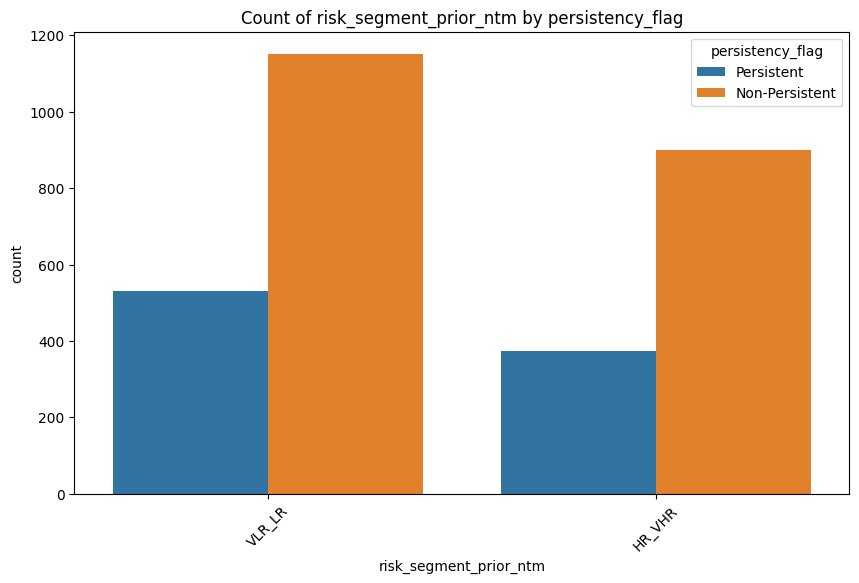

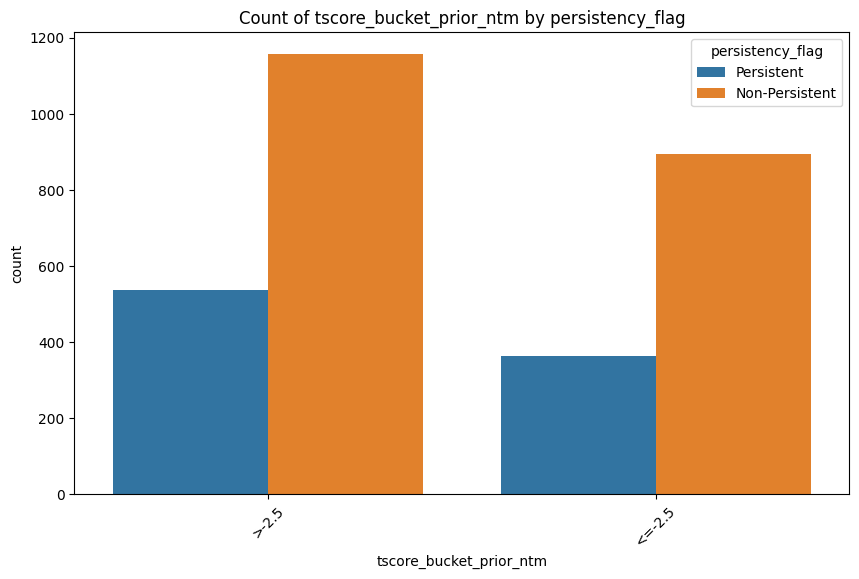

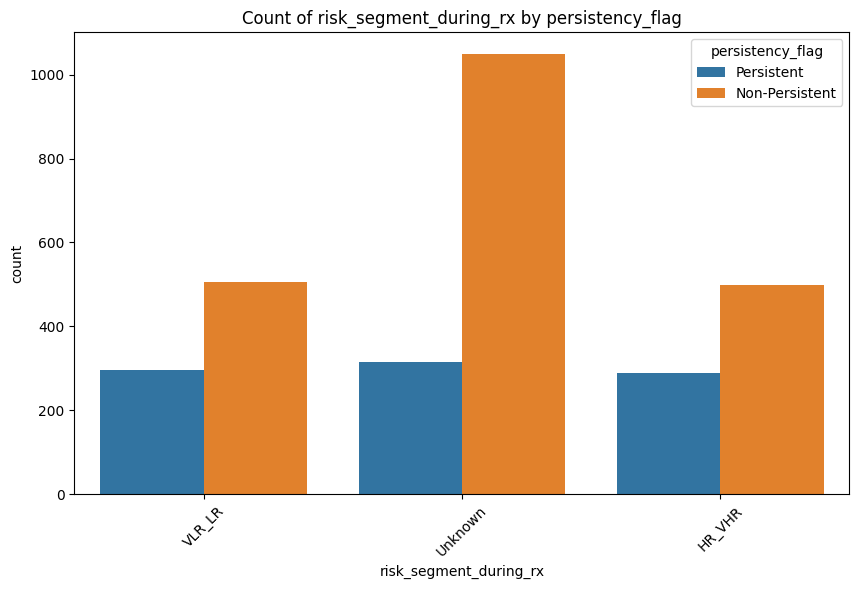

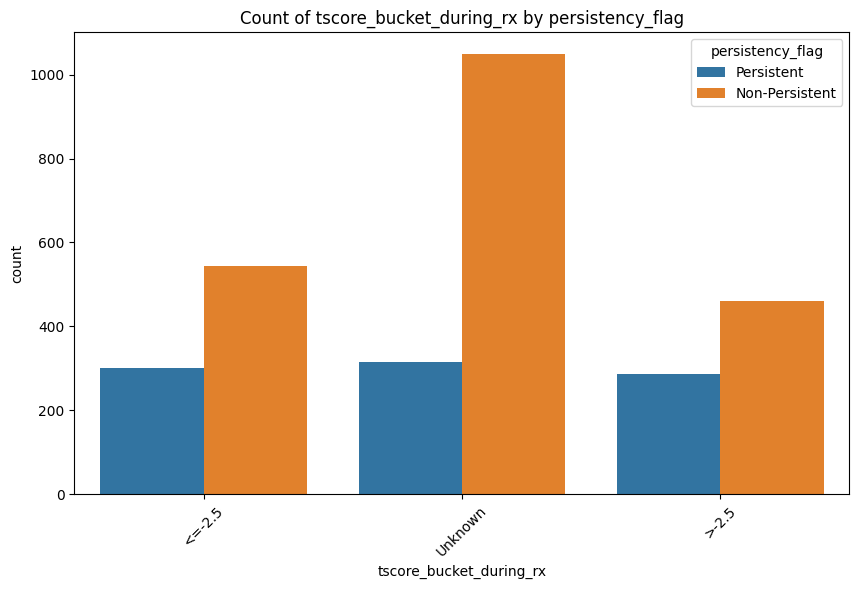

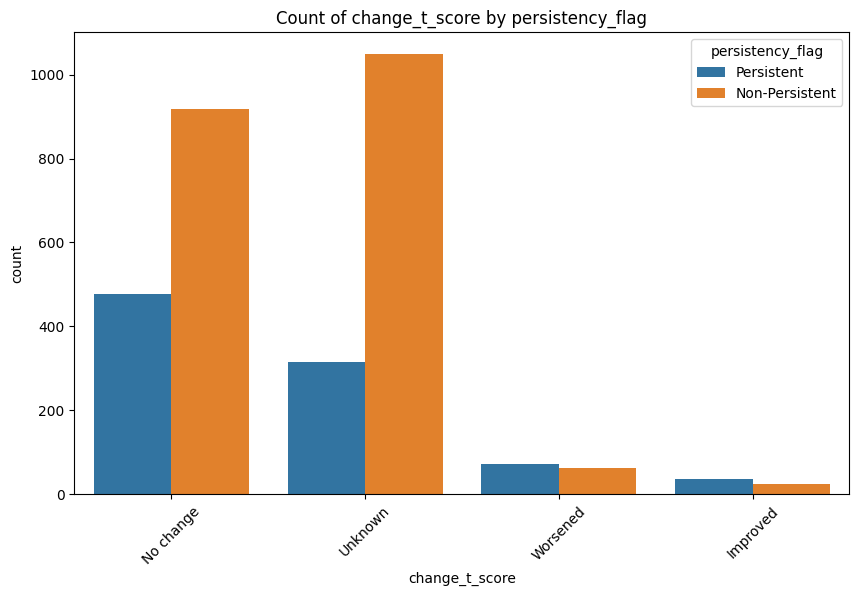

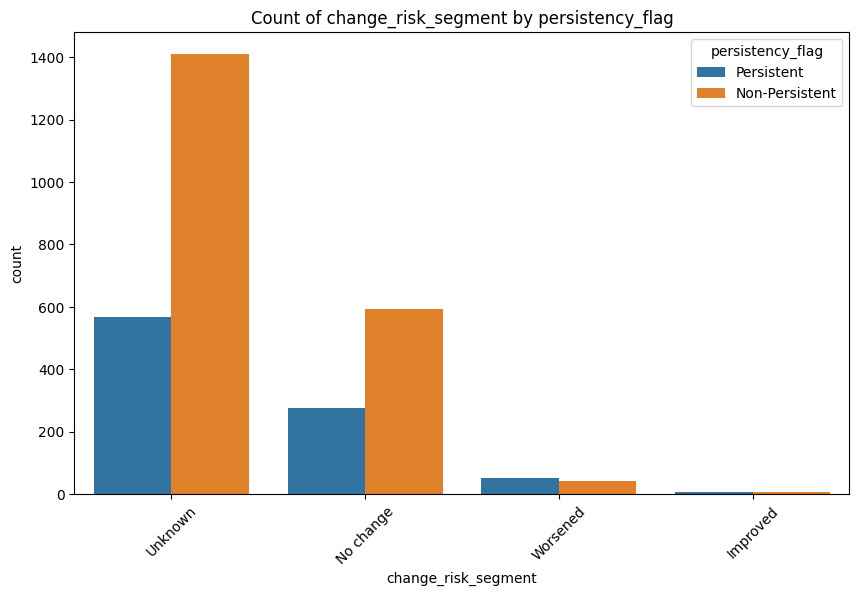

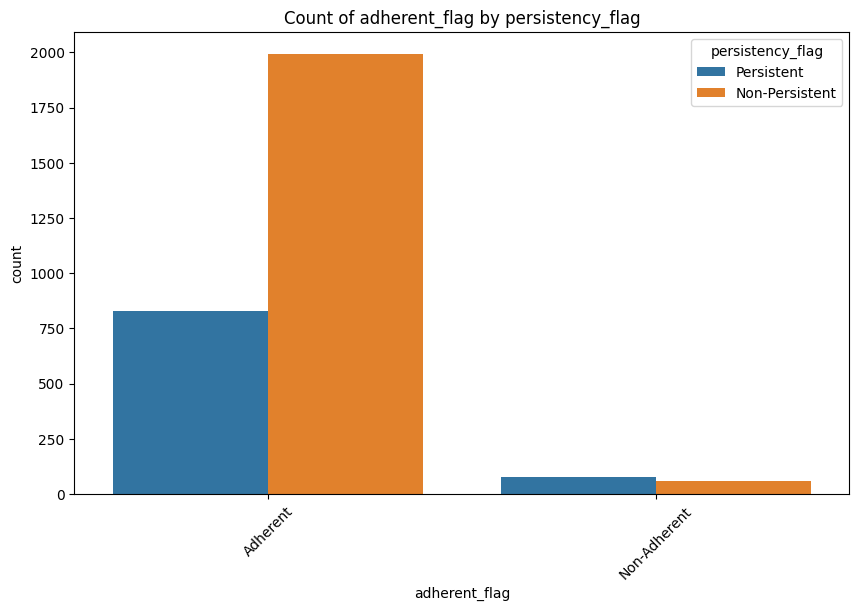

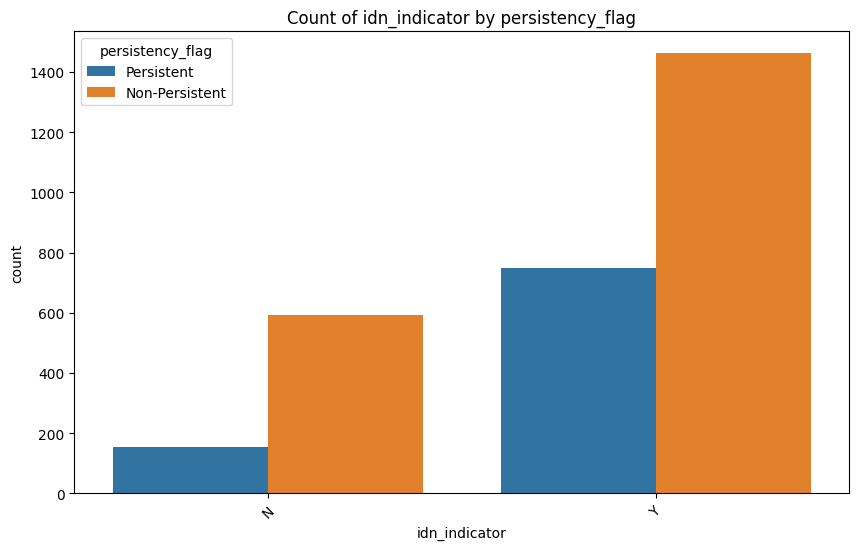

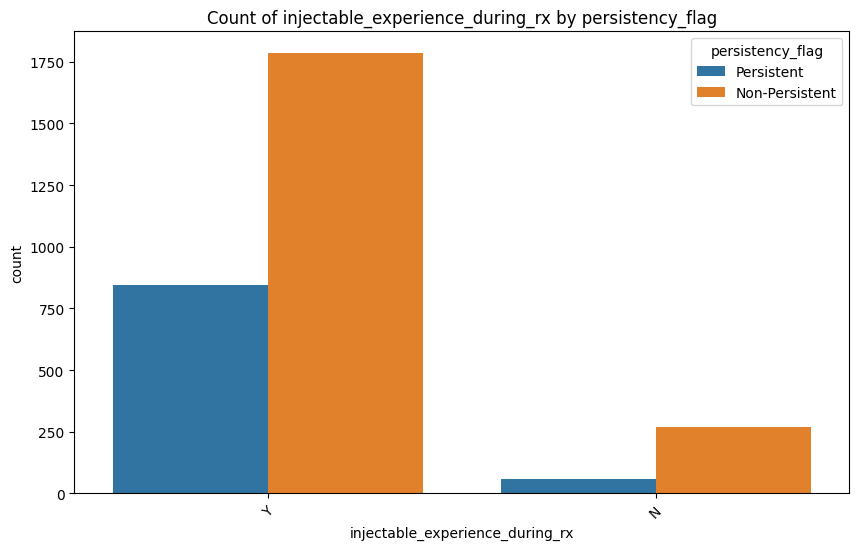

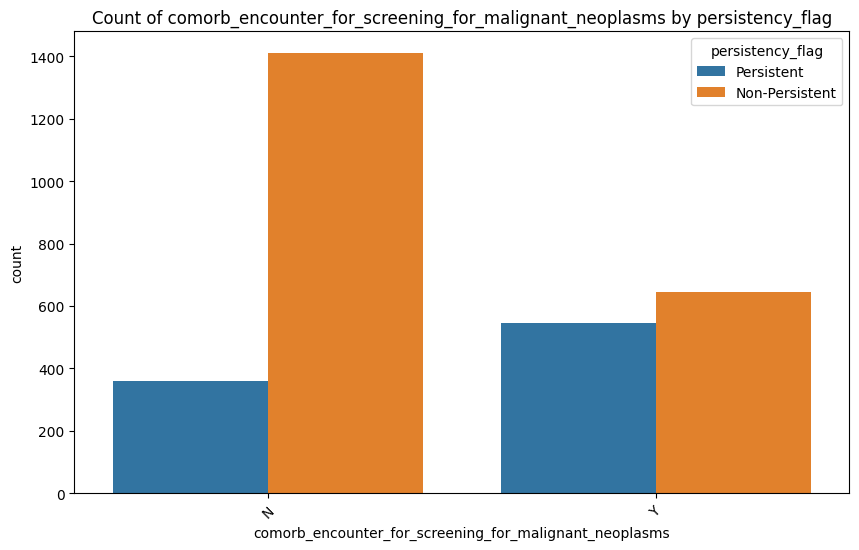

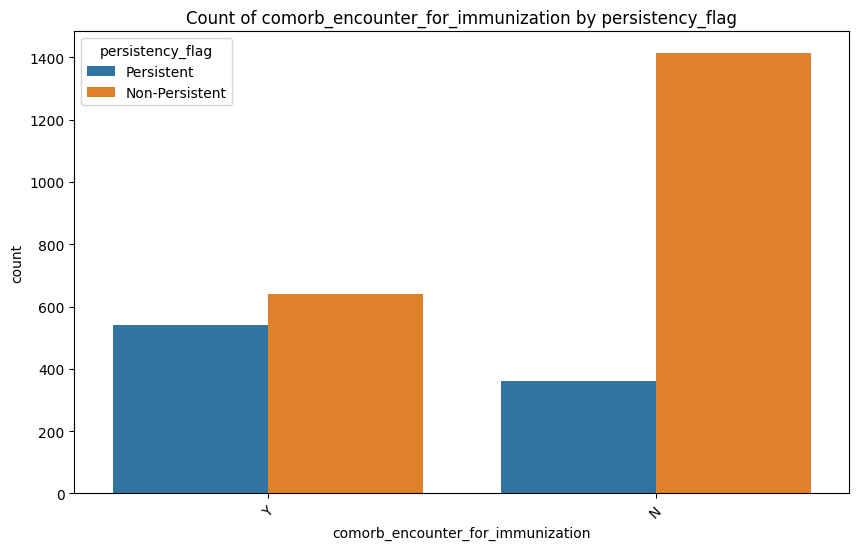

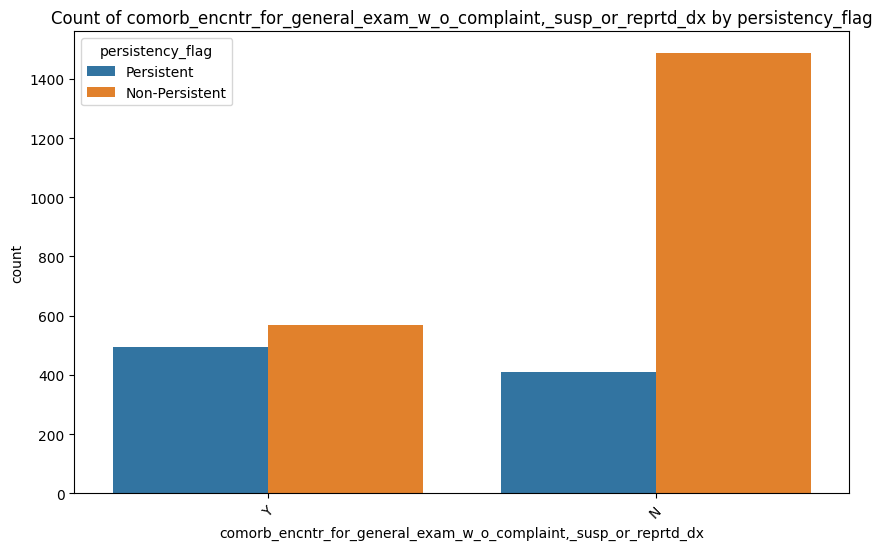

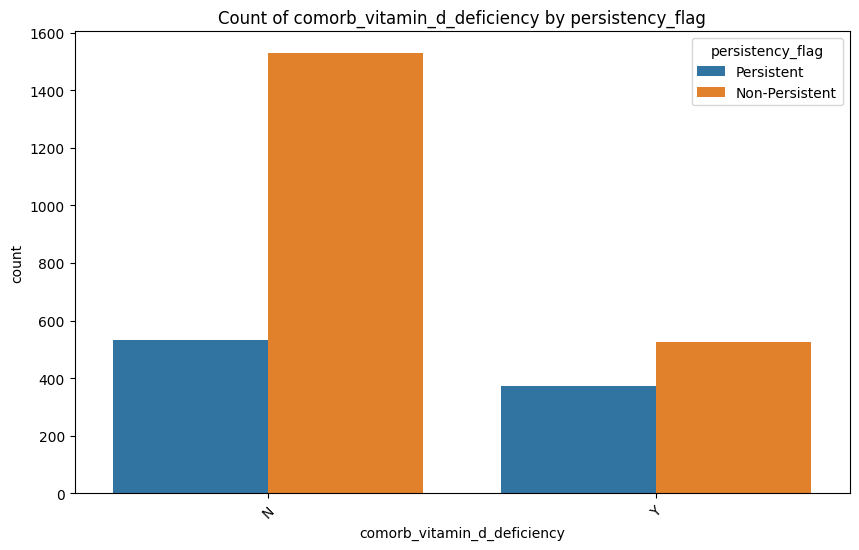

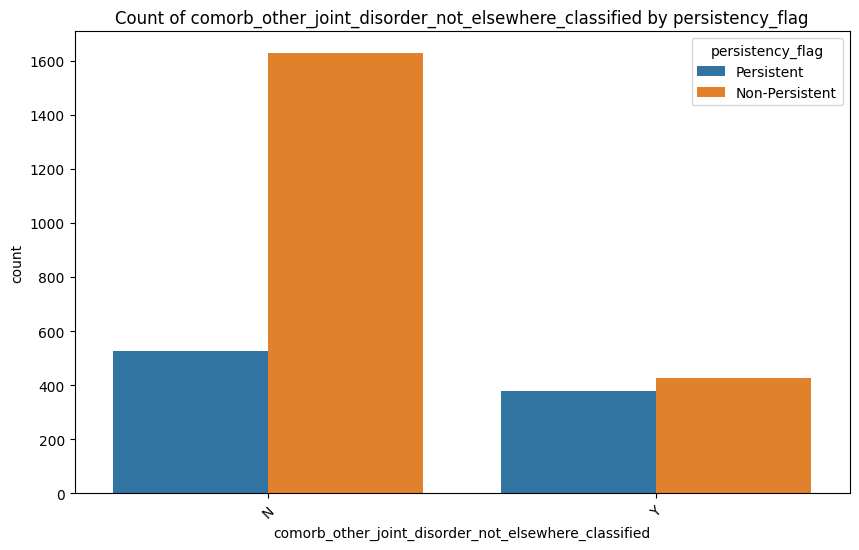

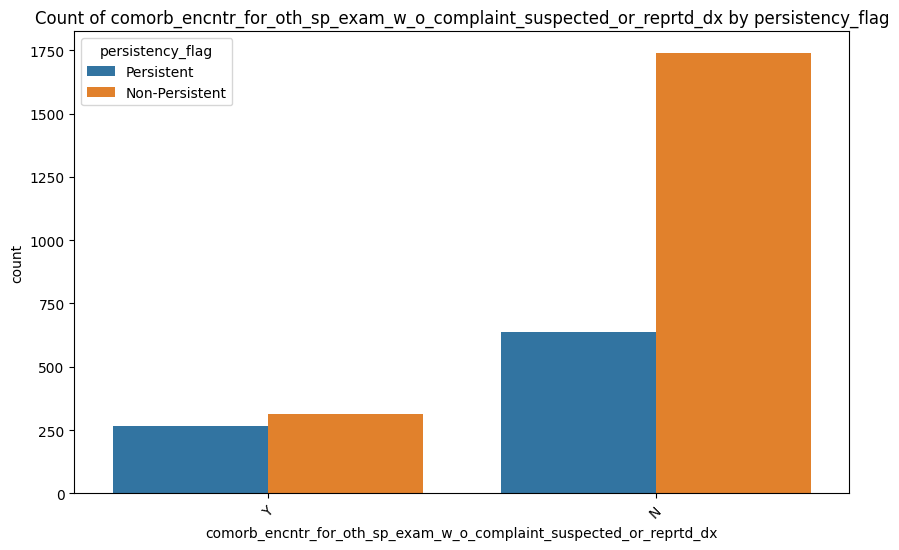

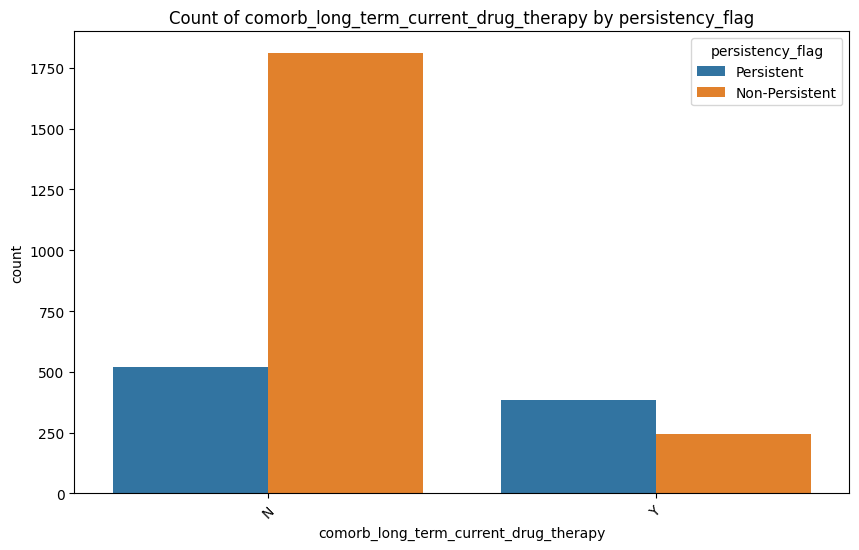

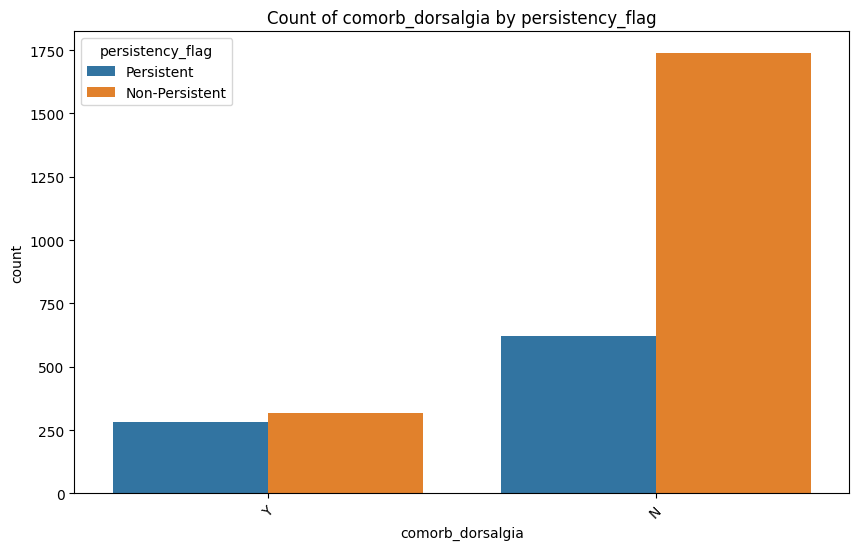

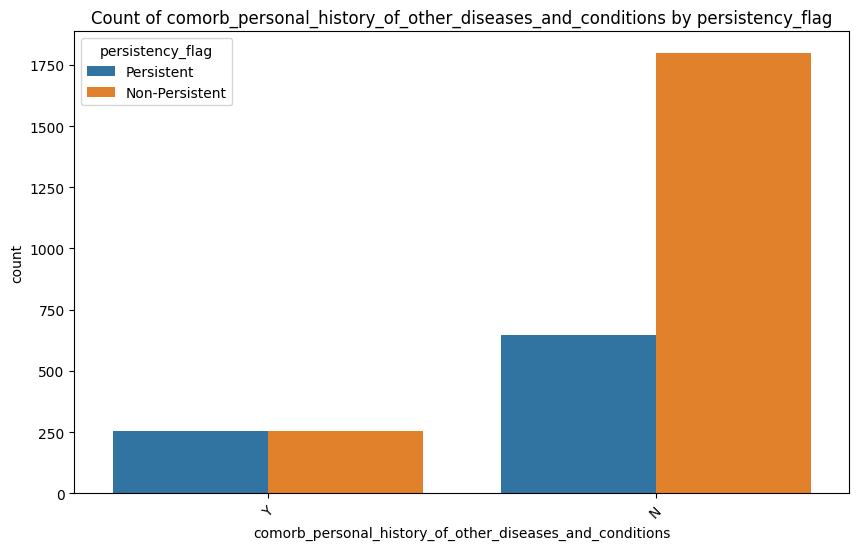

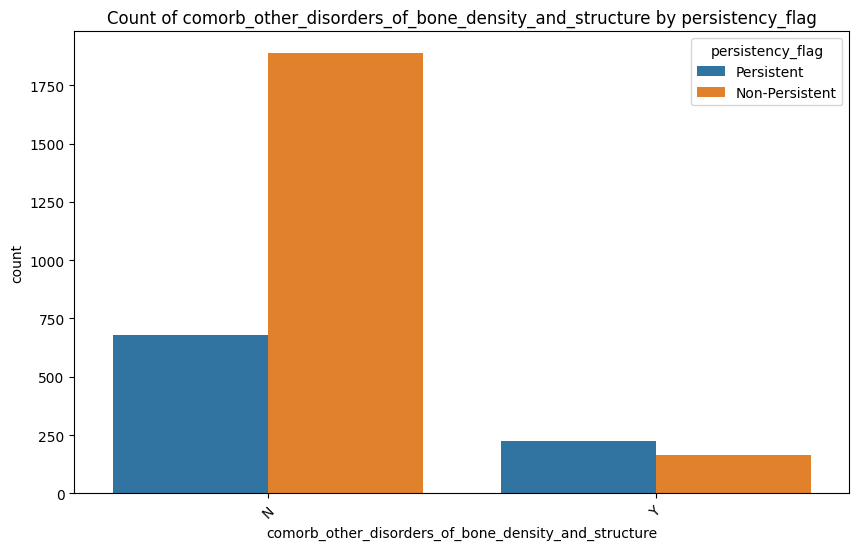

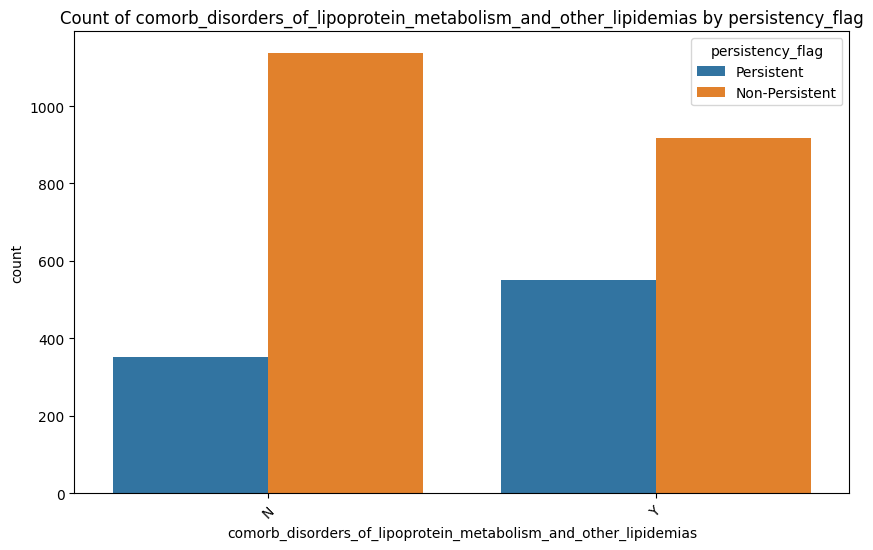

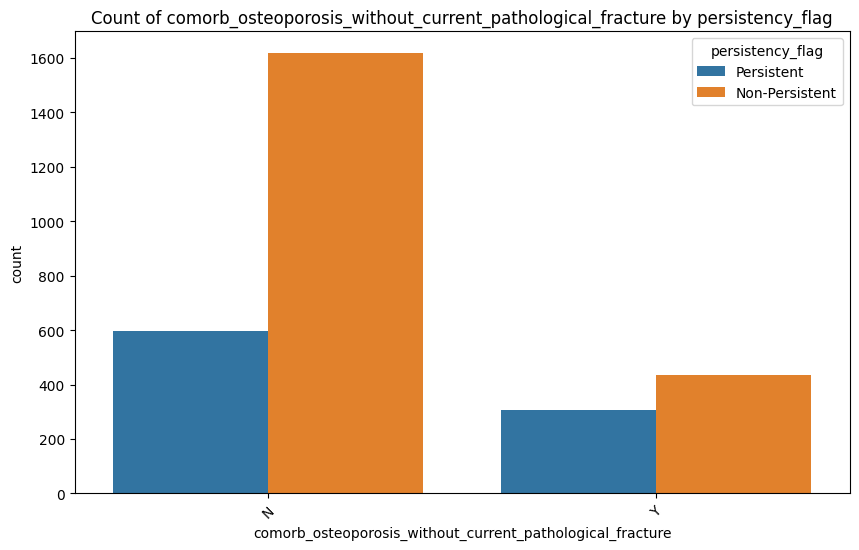

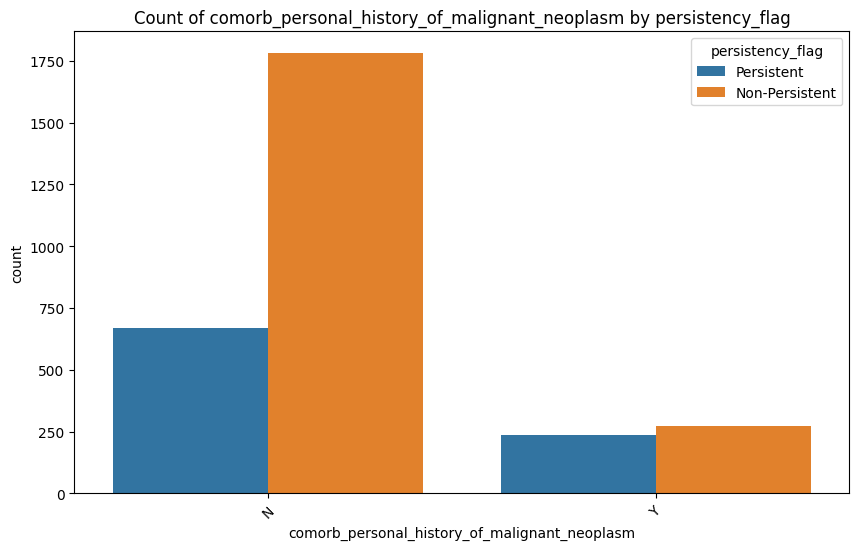

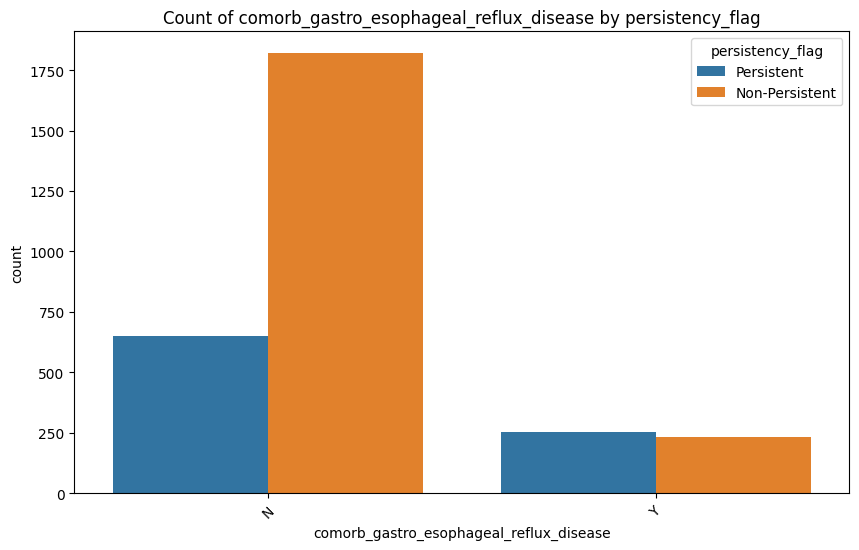

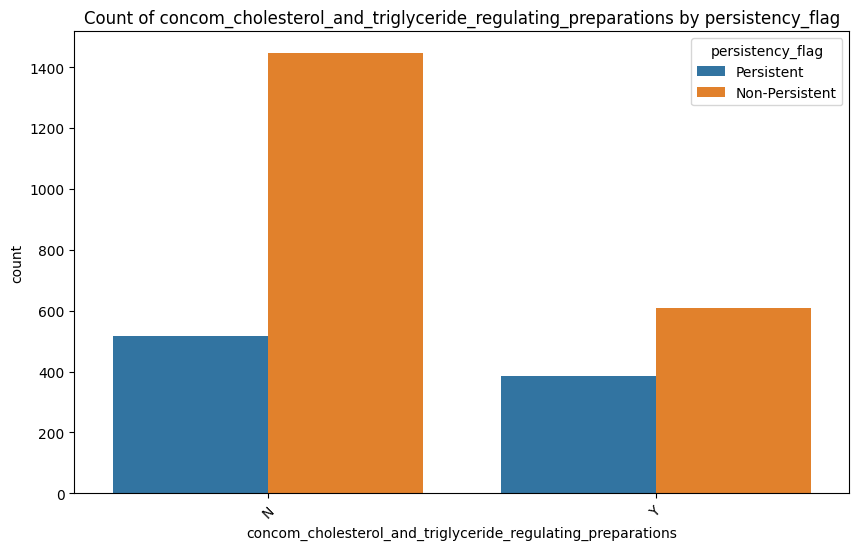

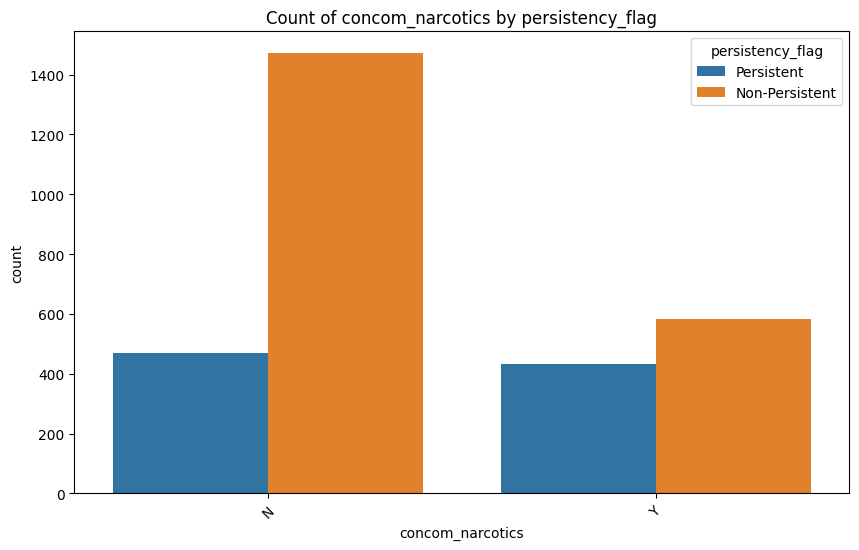

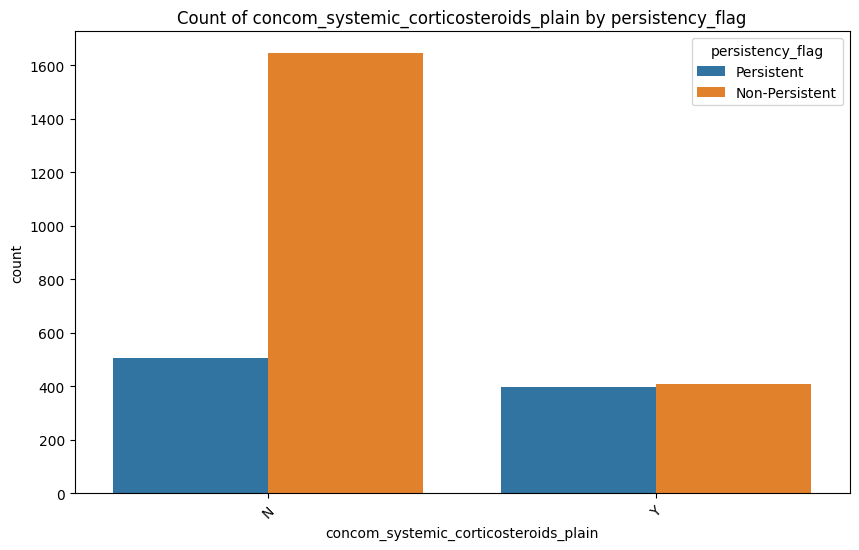

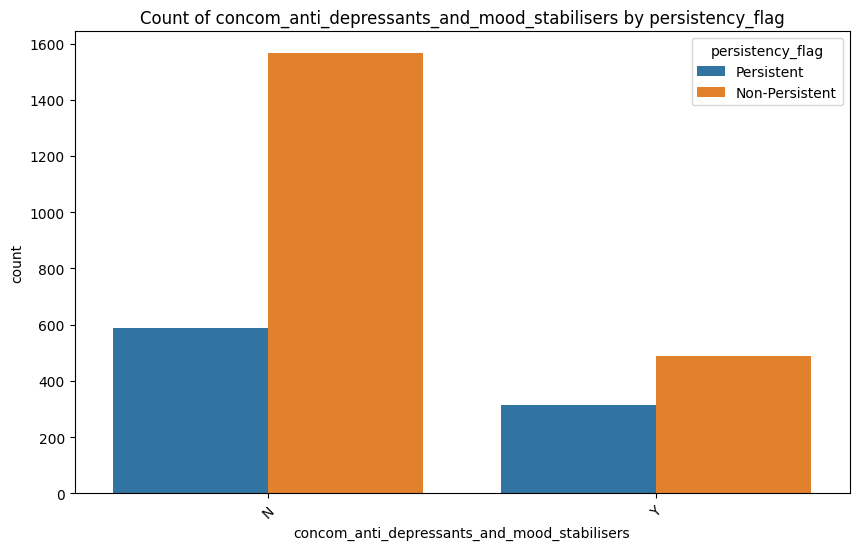

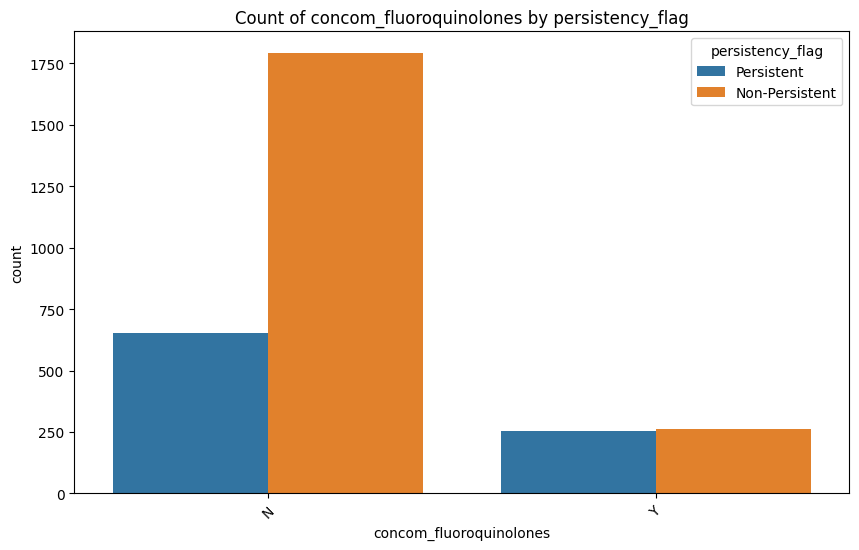

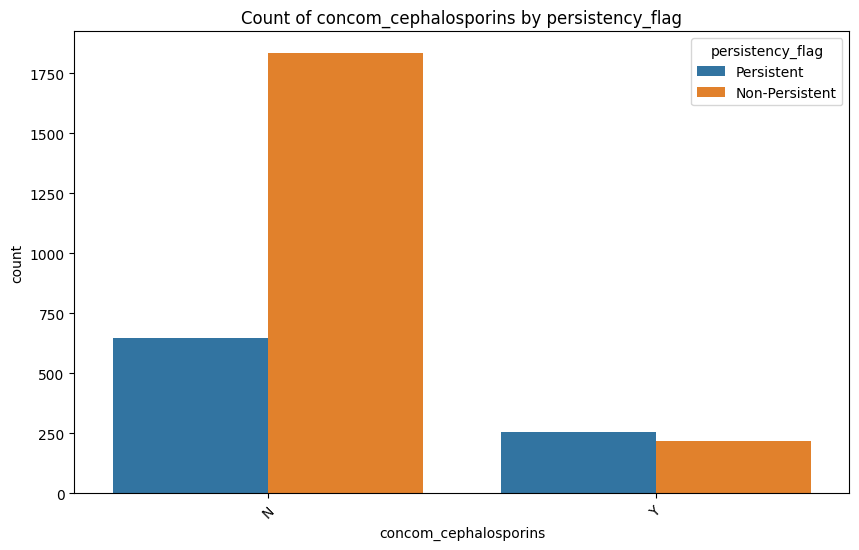

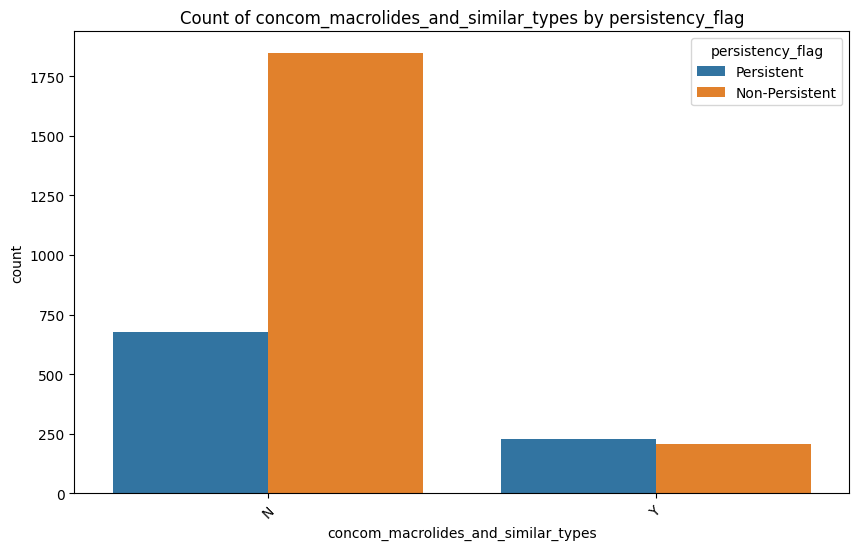

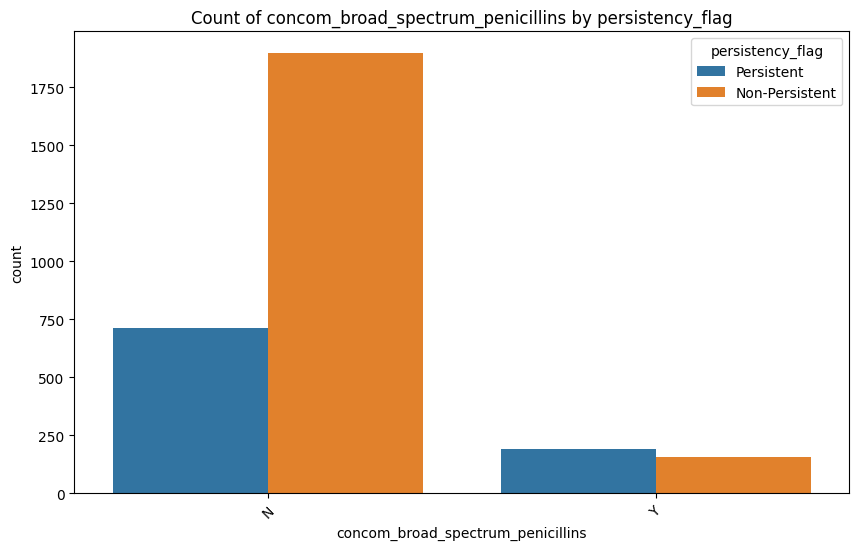

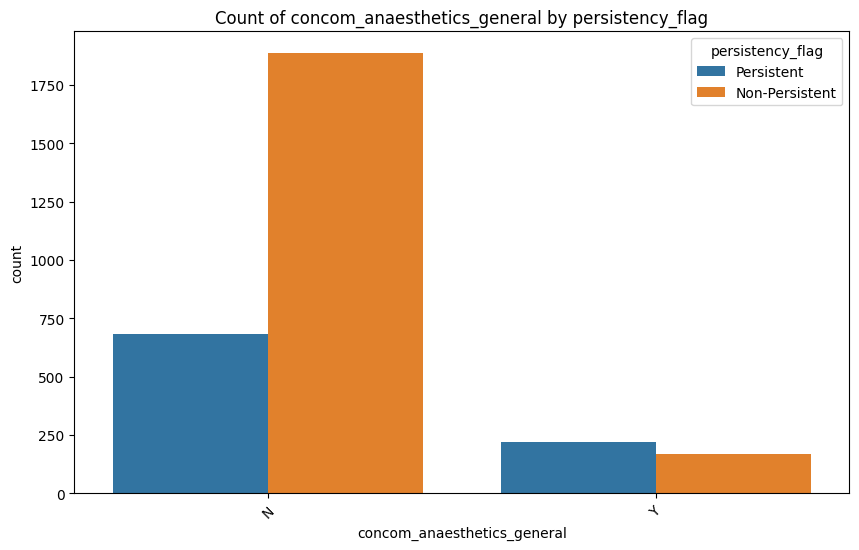

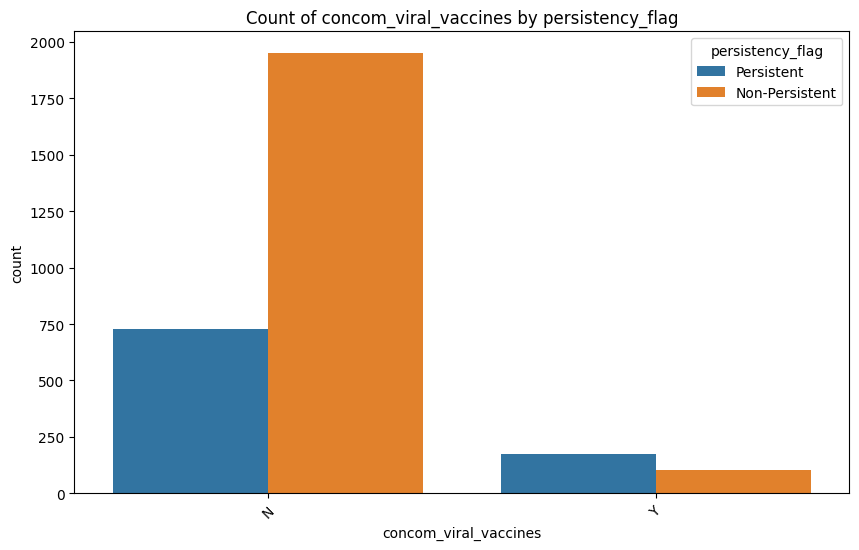

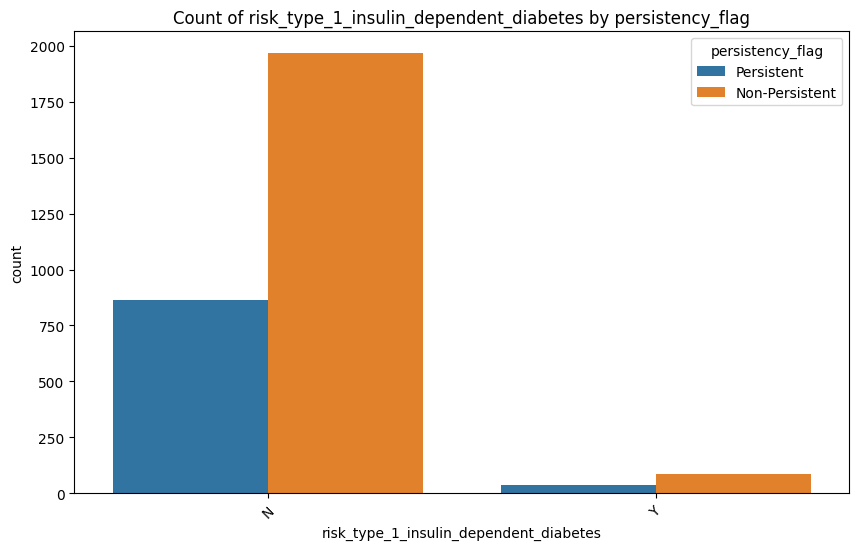

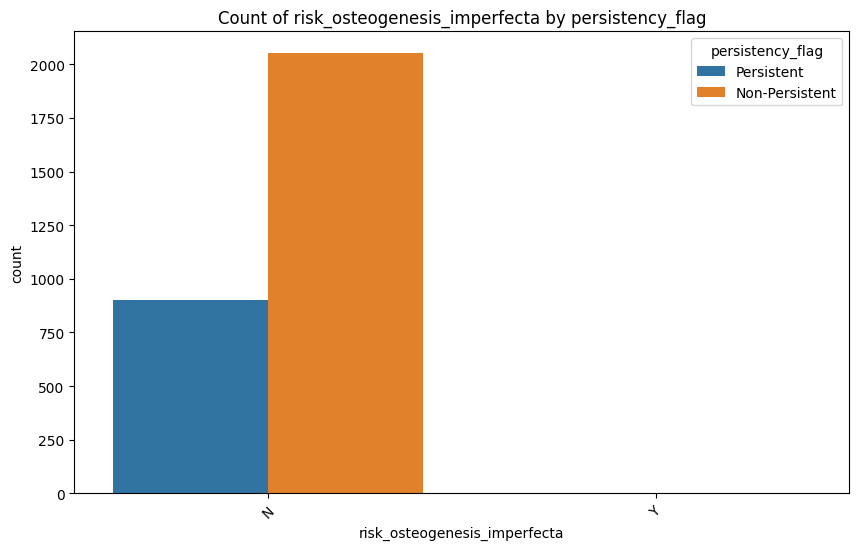

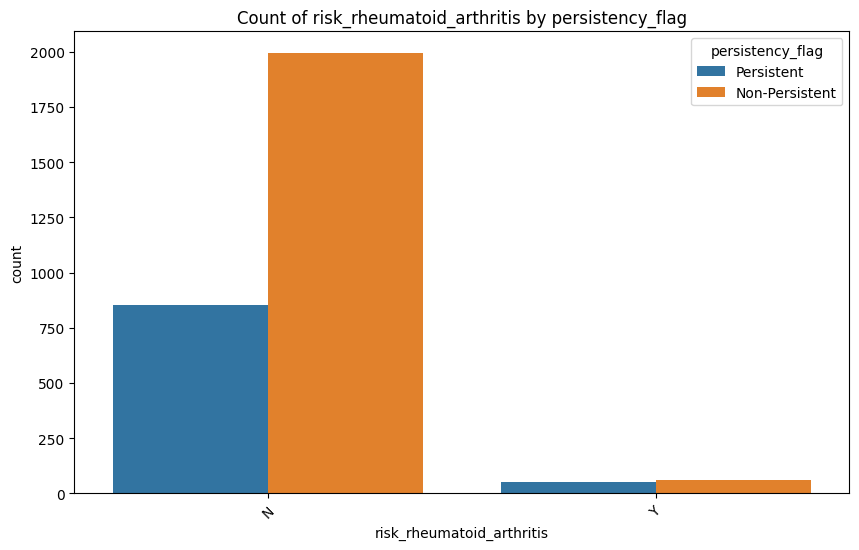

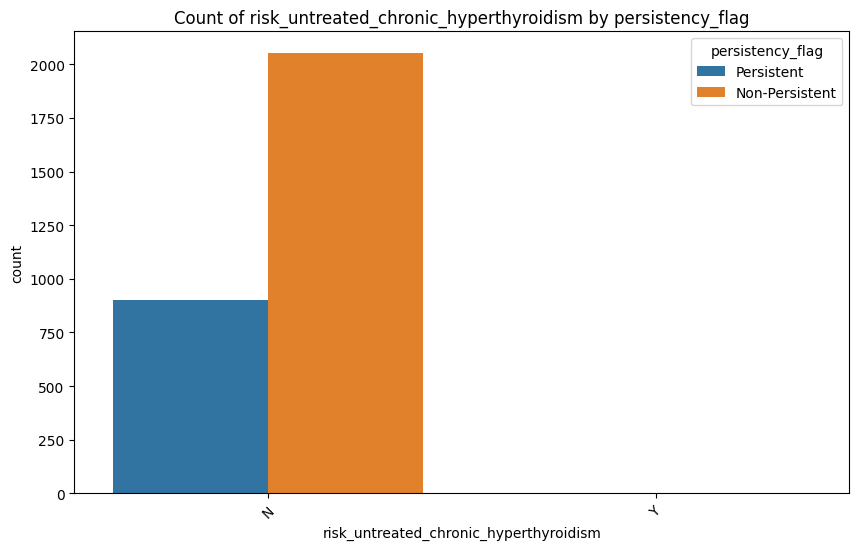

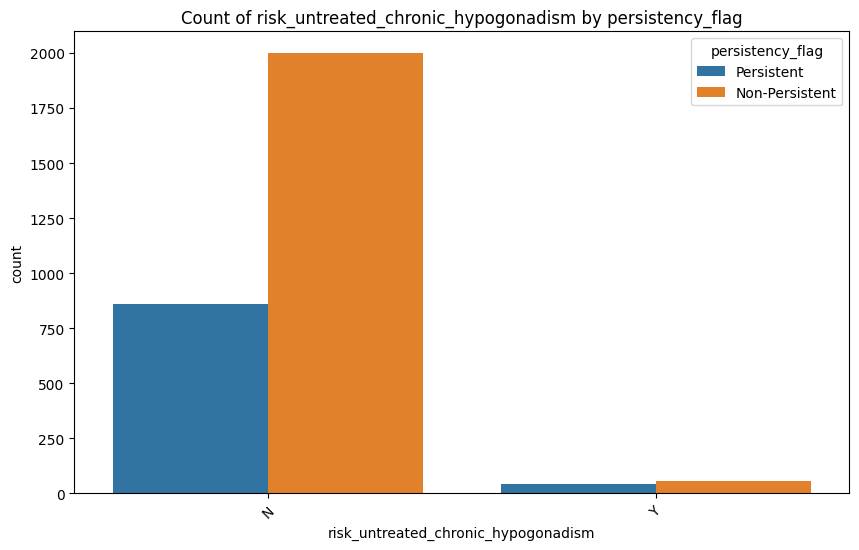

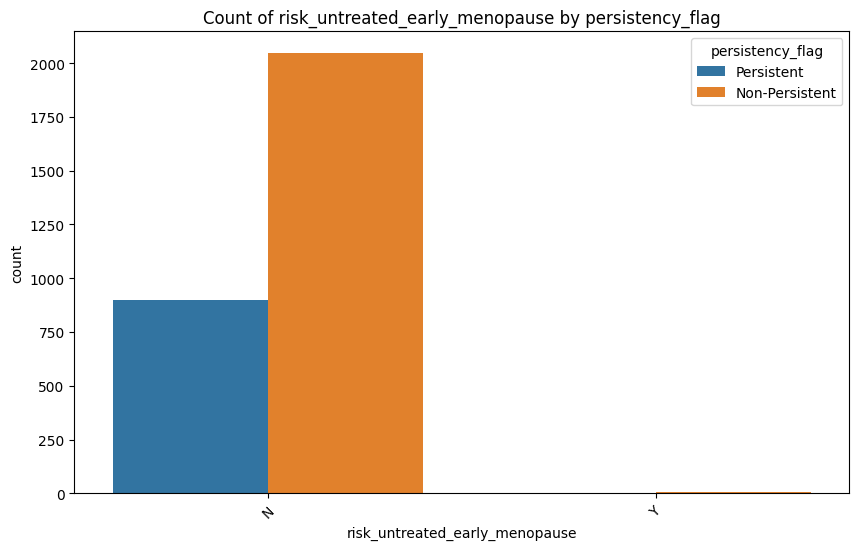

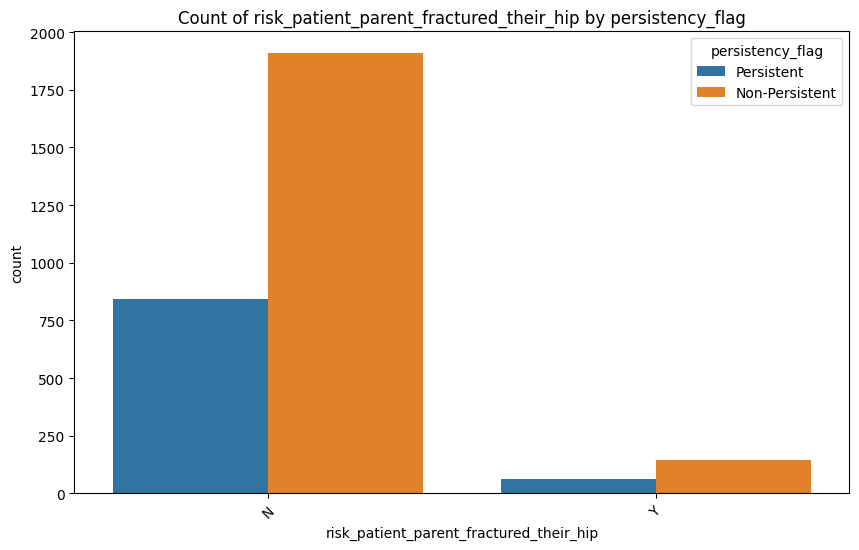

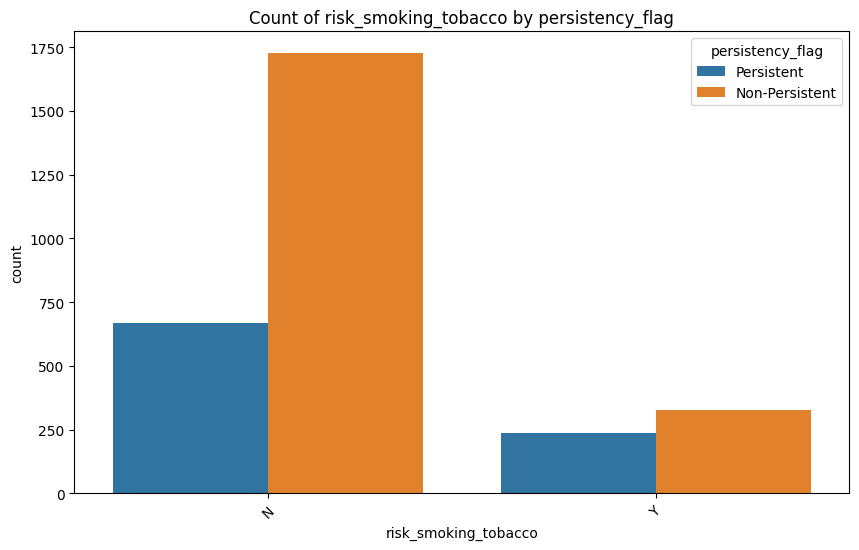

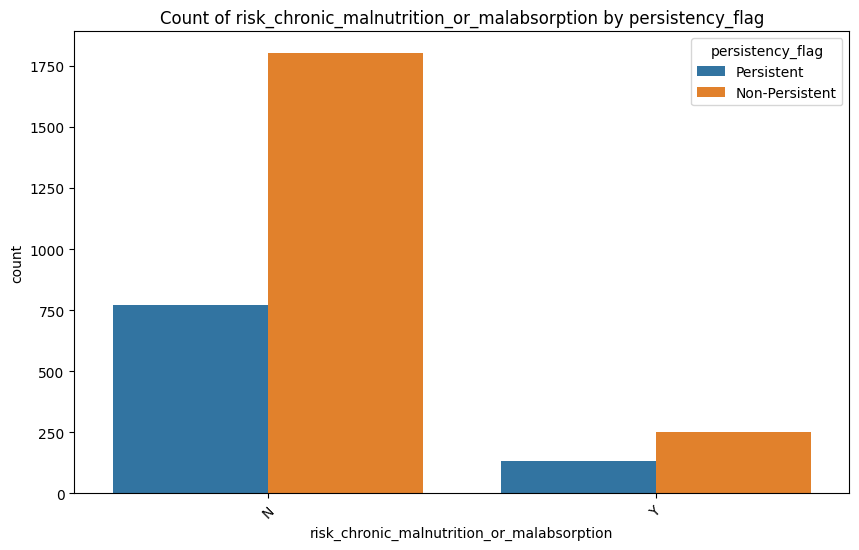

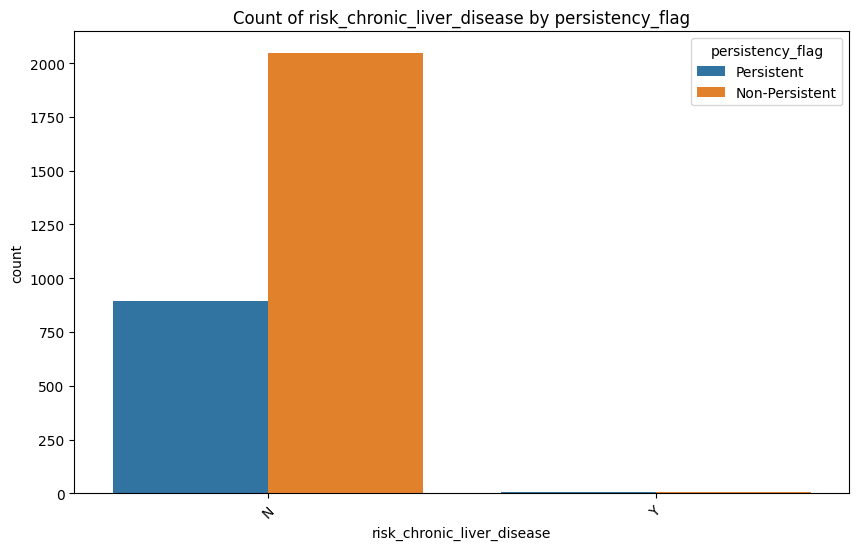

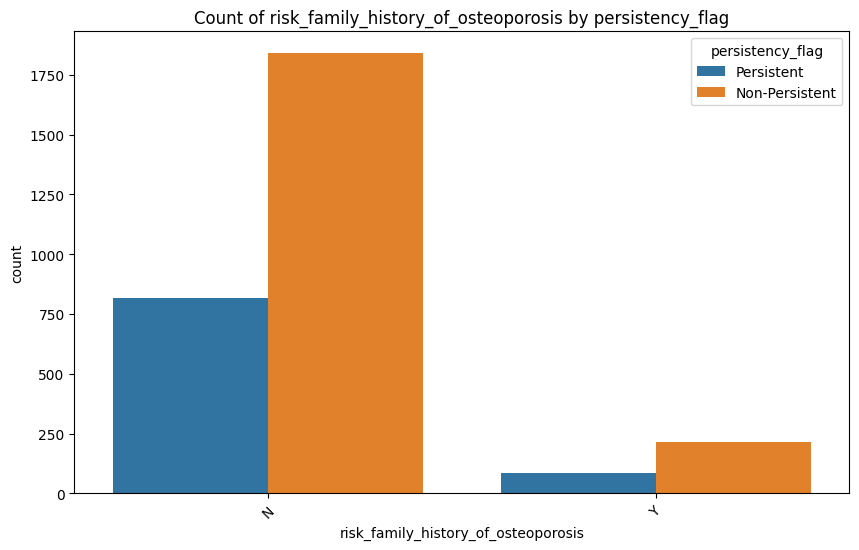

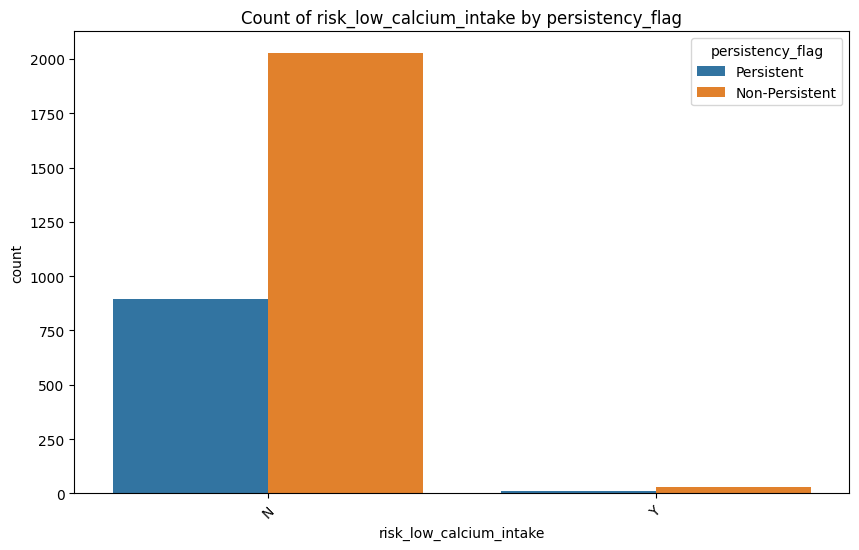

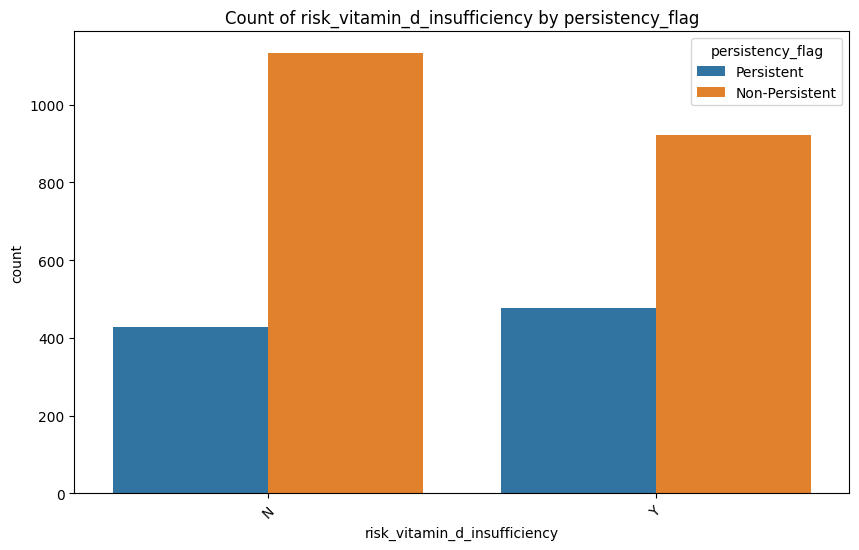

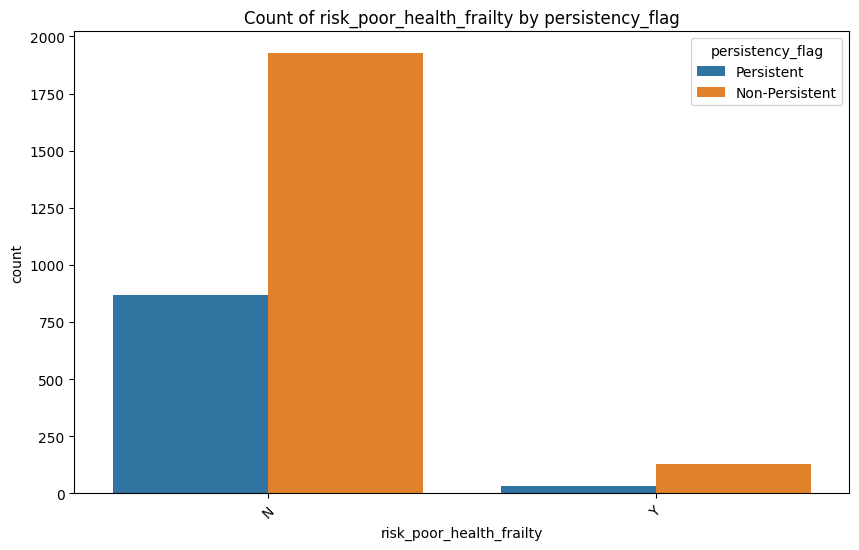

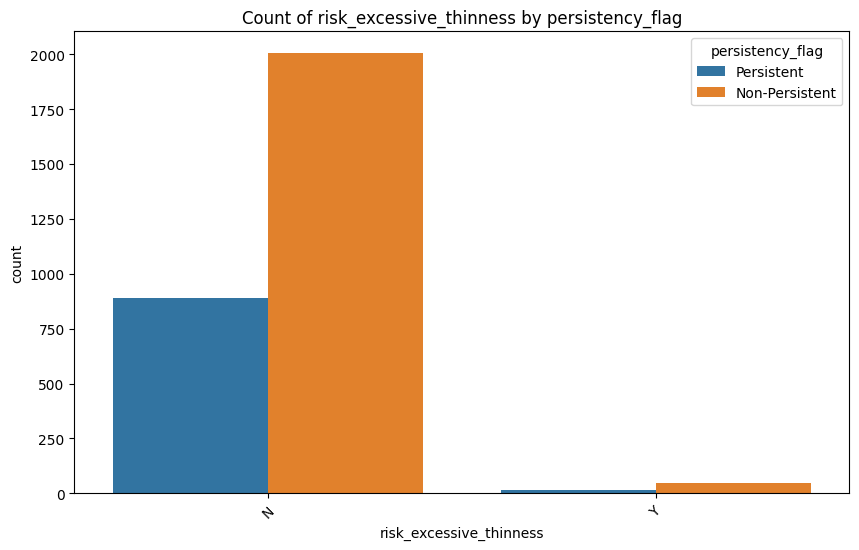

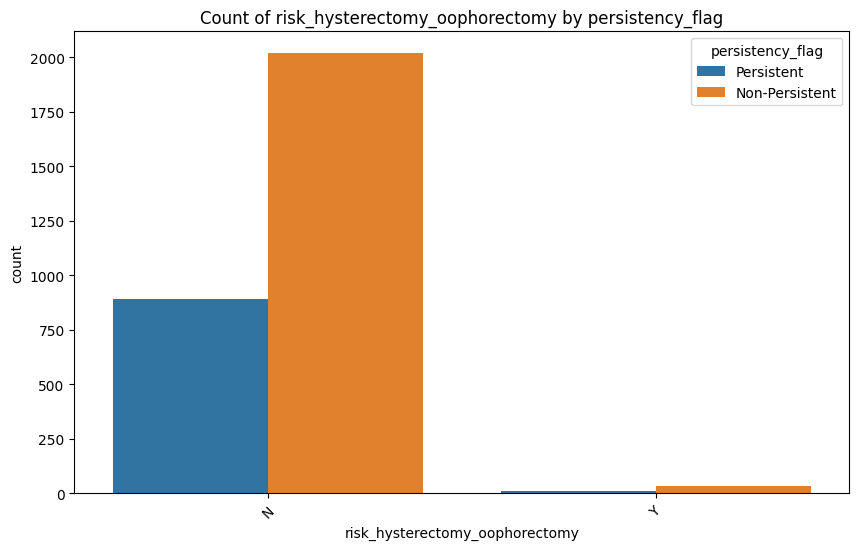

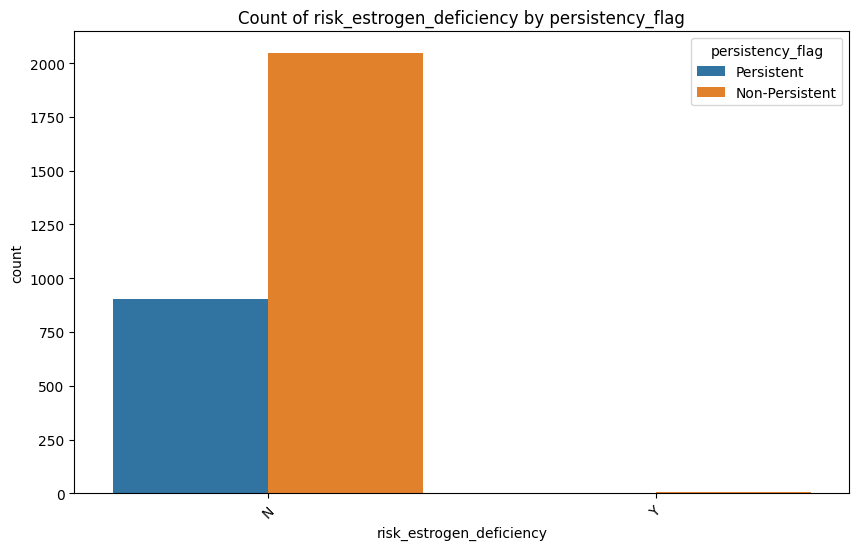

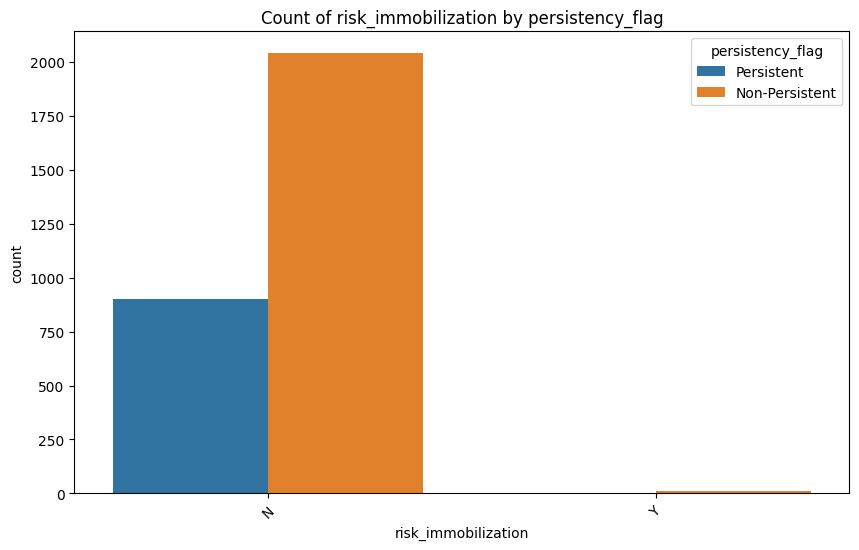

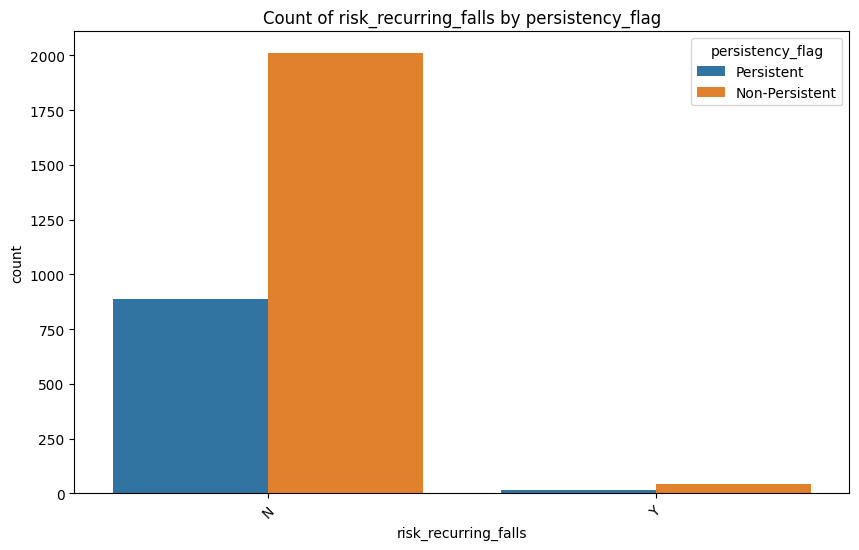

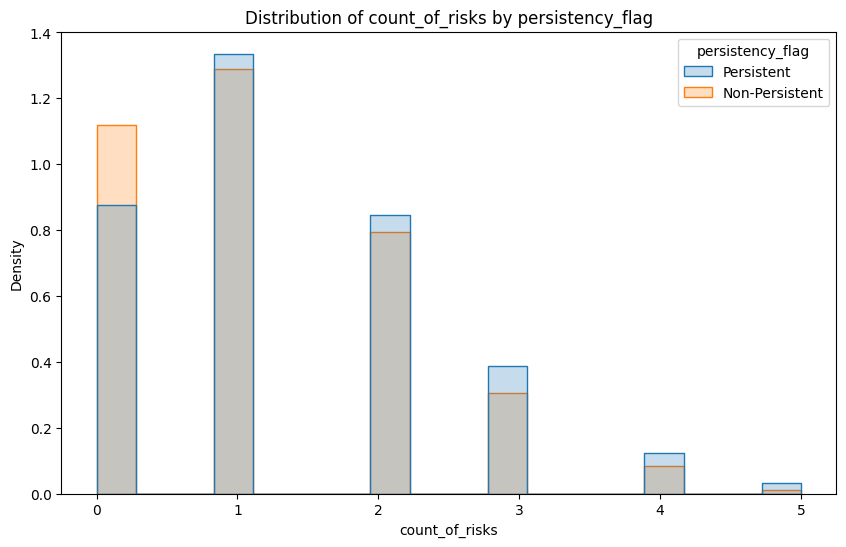

In [ ]:
columns_to_plot = df.columns[df.columns != 'persistency_flag']  # Get a list of columns excluding 'persistency_flag'

# Loop through all columns to create histograms or count plots
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    # Check the data type of the column, if it's numerical, plot a histogram
    if df[column].dtype in ['int64', 'float64']:
        sns.histplot(data=df, x=column, hue='persistency_flag', element='step', stat='density', common_norm=False)
        plt.title(f'Distribution of {column} by persistency_flag')
    # If the column is categorical, use a countplot
    elif df[column].dtype == 'object':
        sns.countplot(data=df, x=column, hue='persistency_flag')
        plt.title(f'Count of {column} by persistency_flag')
        plt.xticks(rotation=45)
    plt.show()

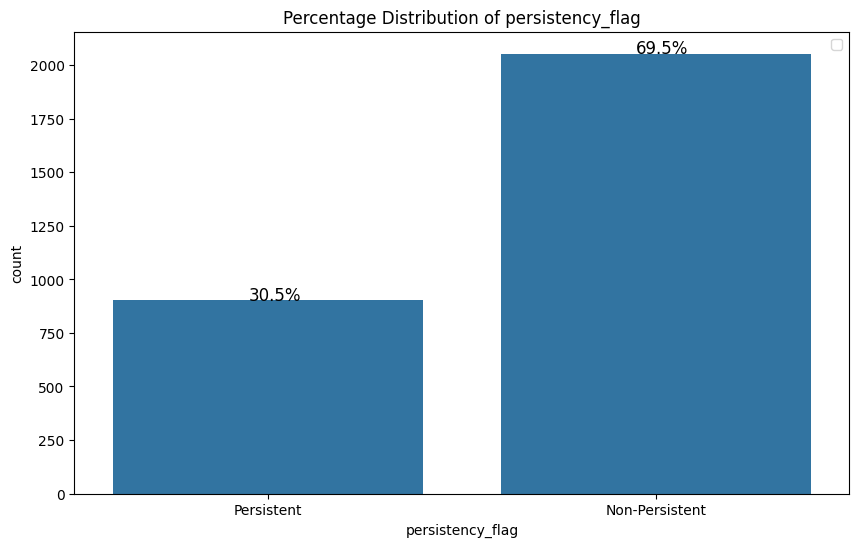

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='persistency_flag', data=df)
plt.title('Percentage Distribution of persistency_flag')
total = len(df['persistency_flag'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)
plt.legend()
plt.show()

In [ ]:
interval_cols = ['dexa_freq_during_rx', 'count_of_risks']

In [ ]:
# Dropping patient ID ptid
if 'ptid' in df.columns:
    df_corr = df.drop(columns=['ptid'])

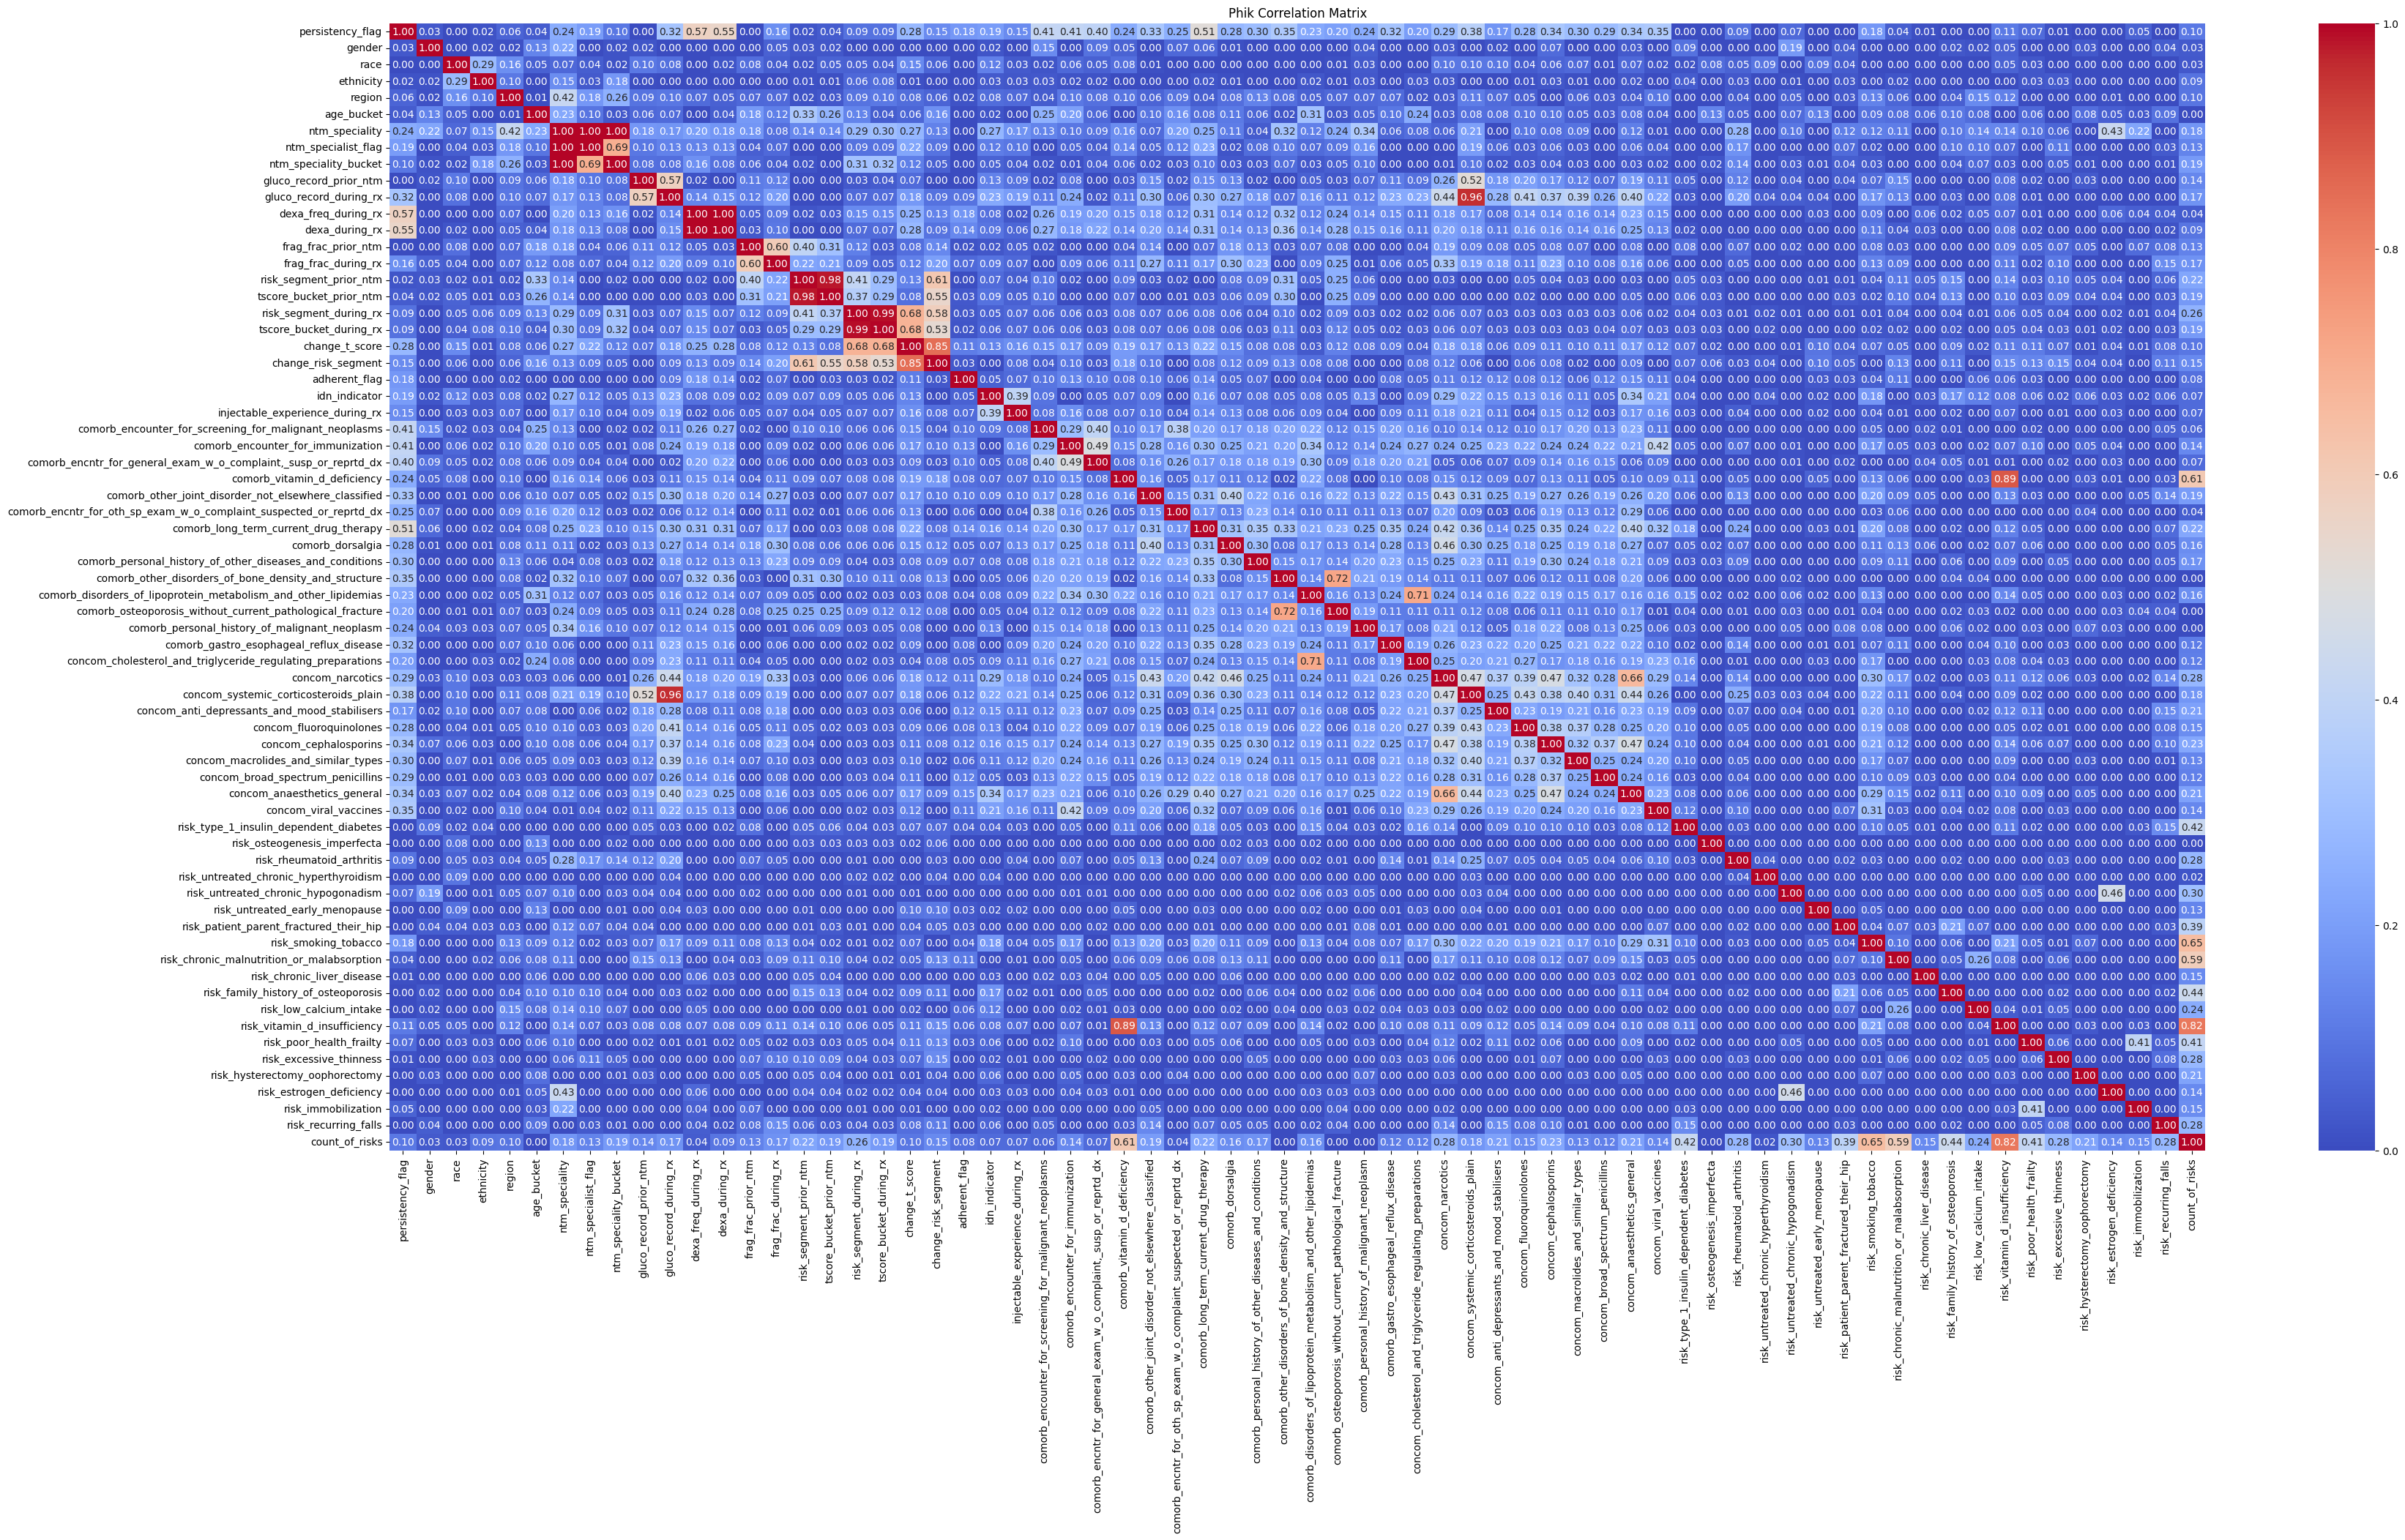

In [ ]:
# Calculate the phik correlation matrix
phik_matrix = df_corr.phik_matrix(interval_cols=interval_cols)

# Visualize the phik correlation matrix using matplotlib
plt.figure(figsize=(40, 20))
plt.title('Phik Correlation Matrix')
sns.heatmap(phik_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

#Findings

69 columns
data.types: object, int64

No N/A
Outliers in columns ['dexa_freq_during_rx', 'count_of_risks']  
Outliers were removed: Original DataFrame size: 3424  
New DataFrame size without outliers: 2956  
phik_matrix correlation shows  multicollinearity of some columns  
This will need to be taken into account in further training of models  

Many binary data having 'Y','N' values

target column is Persistency_flag (binary column)


# **Data Cleaning and Transformation**

In [ ]:
df.head()

ptid persistency_flag  gender           race     ethnicity   region  \
0   P1       Persistent    Male      Caucasian  Not Hispanic     West   
1   P2   Non-Persistent    Male          Asian  Not Hispanic     West   
2   P3   Non-Persistent  Female  Other/Unknown      Hispanic  Midwest   
3   P4   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
4   P5   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   

  age_bucket        ntm_speciality ntm_specialist_flag  \
0        >75  GENERAL PRACTITIONER              Others   
1      55-65  GENERAL PRACTITIONER              Others   
2      65-75  GENERAL PRACTITIONER              Others   
3        >75  GENERAL PRACTITIONER              Others   
4        >75  GENERAL PRACTITIONER              Others   

       ntm_speciality_bucket gluco_record_prior_ntm gluco_record_during_rx  \
0  OB/GYN/Others/PCP/Unknown                      N                      N   
1  OB/GYN/Others/PCP/Unknown                      N                      N   
2  OB/GYN/Others/PCP/Unknown                      N                      N   
3  OB/GYN/Others/PCP/Unknown                      N                      Y   
4  OB/GYN/Others/PCP/Unknown                      Y                      Y   

   dexa_freq_during_rx dexa_during_rx frag_frac_prior_ntm frag_frac_during_rx  \
0                    0              N                   N                   N   
1                    0              N                   N                   N   
2                    0              N                   N                   N   
3                    0              N                   N                   N   
4                    0              N                   N                   N   

  risk_segment_prior_ntm tscore_bucket_prior_ntm risk_segment_during_rx  \
0                 VLR_LR                   >-2.5                 VLR_LR   
1                 VLR_LR                   >-2.5                Unknown   
2                 HR_VHR                  <=-2.5                 HR_VHR   
3                 HR_VHR                   >-2.5                 HR_VHR   
4                 HR_VHR                  <=-2.5                Unknown   

  tscore_bucket_during_rx change_t_score change_risk_segment adherent_flag  \
0                  <=-2.5      No change             Unknown      Adherent   
1                 Unknown        Unknown             Unknown      Adherent   
2                  <=-2.5      No change           No change      Adherent   
3                  <=-2.5      No change           No change      Adherent   
4                 Unknown        Unknown             Unknown      Adherent   

  idn_indicator injectable_experience_during_rx  \
0             N                               Y   
1             N                               Y   
2             N                               Y   
3             N                               Y   
4             N                               Y   

  comorb_encounter_for_screening_for_malignant_neoplasms  \
0                                                  N       
1                                                  N       
2                                                  Y       
3                                                  N       
4                                                  Y       

  comorb_encounter_for_immunization  \
0                                 Y   
1                                 N   
2                                 N   
3                                 Y   
4                                 Y   

  comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx  \
0                                                  Y                
1                                                  Y                
2                                                  Y                
3                                                  Y                
4                                                  Y                

  comorb_vitamin_d_d

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2956 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   ptid                                                                2956 non-null   object
 1   persistency_flag                                                    2956 non-null   object
 2   gender                                                              2956 non-null   object
 3   race                                                                2956 non-null   object
 4   ethnicity                                                           2956 non-null   object
 5   region                                                              2956 non-null   object
 6   age_bucket                                                          2956 non-null   object
 7   ntm_speciality               

In [ ]:
# Select numerical columns for scaling (change this based on your DataFrame's specific columns)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_cols])
# Fit and transform the numerical data for standardization
df_scaled = pd.DataFrame(scaled_data, columns=numerical_cols, index=df.index)

# Replace the original numerical columns with the scaled ones
df.update(df_scaled)

In [ ]:
df.head()

ptid persistency_flag  gender           race     ethnicity   region  \
0   P1       Persistent    Male      Caucasian  Not Hispanic     West   
1   P2   Non-Persistent    Male          Asian  Not Hispanic     West   
2   P3   Non-Persistent  Female  Other/Unknown      Hispanic  Midwest   
3   P4   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
4   P5   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   

  age_bucket        ntm_speciality ntm_specialist_flag  \
0        >75  GENERAL PRACTITIONER              Others   
1      55-65  GENERAL PRACTITIONER              Others   
2      65-75  GENERAL PRACTITIONER              Others   
3        >75  GENERAL PRACTITIONER              Others   
4        >75  GENERAL PRACTITIONER              Others   

       ntm_speciality_bucket gluco_record_prior_ntm gluco_record_during_rx  \
0  OB/GYN/Others/PCP/Unknown                      N                      N   
1  OB/GYN/Others/PCP/Unknown                      N                      N   
2  OB/GYN/Others/PCP/Unknown                      N                      N   
3  OB/GYN/Others/PCP/Unknown                      N                      Y   
4  OB/GYN/Others/PCP/Unknown                      Y                      Y   

   dexa_freq_during_rx dexa_during_rx frag_frac_prior_ntm frag_frac_during_rx  \
0             -0.40955              N                   N                   N   
1             -0.40955              N                   N                   N   
2             -0.40955              N                   N                   N   
3             -0.40955              N                   N                   N   
4             -0.40955              N                   N                   N   

  risk_segment_prior_ntm tscore_bucket_prior_ntm risk_segment_during_rx  \
0                 VLR_LR                   >-2.5                 VLR_LR   
1                 VLR_LR                   >-2.5                Unknown   
2                 HR_VHR                  <=-2.5                 HR_VHR   
3                 HR_VHR                   >-2.5                 HR_VHR   
4                 HR_VHR                  <=-2.5                Unknown   

  tscore_bucket_during_rx change_t_score change_risk_segment adherent_flag  \
0                  <=-2.5      No change             Unknown      Adherent   
1                 Unknown        Unknown             Unknown      Adherent   
2                  <=-2.5      No change           No change      Adherent   
3                  <=-2.5      No change           No change      Adherent   
4                 Unknown        Unknown             Unknown      Adherent   

  idn_indicator injectable_experience_during_rx  \
0             N                               Y   
1             N                               Y   
2             N                               Y   
3             N                               Y   
4             N                               Y   

  comorb_encounter_for_screening_for_malignant_neoplasms  \
0                                                  N       
1                                                  N       
2                                                  Y       
3                                                  N       
4                                                  Y       

  comorb_encounter_for_immunization  \
0                                 Y   
1                                 N   
2                                 N   
3                                 Y   
4                                 Y   

  comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx  \
0                                                  Y                
1                                                  Y                
2                                                  Y                
3                                                  Y                
4                                                  Y                

  comorb_vitamin_d_d

In [ ]:
df = df.drop(['ptid'], axis=1)

In [ ]:
mapper = {'N': 0, 'Y':1}
df = df.replace(mapper)

In [ ]:
df['persistency_flag'] = df['persistency_flag'].replace(['Non-Persistent', 'Persistent'],[0, 1])
df.head()

persistency_flag  gender           race     ethnicity   region age_bucket  \
0                 1    Male      Caucasian  Not Hispanic     West        >75   
1                 0    Male          Asian  Not Hispanic     West      55-65   
2                 0  Female  Other/Unknown      Hispanic  Midwest      65-75   
3                 0  Female      Caucasian  Not Hispanic  Midwest        >75   
4                 0  Female      Caucasian  Not Hispanic  Midwest        >75   

         ntm_speciality ntm_specialist_flag      ntm_speciality_bucket  \
0  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
1  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
2  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
3  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
4  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   

   gluco_record_prior_ntm  gluco_record_during_rx  dexa_freq_during_rx  \
0                       0                       0             -0.40955   
1                       0                       0             -0.40955   
2                       0                       0             -0.40955   
3                       0                       1             -0.40955   
4                       1                       1             -0.40955   

   dexa_during_rx  frag_frac_prior_ntm  frag_frac_during_rx  \
0               0                    0                    0   
1               0                    0                    0   
2               0                    0                    0   
3               0                    0                    0   
4               0                    0                    0   

  risk_segment_prior_ntm tscore_bucket_prior_ntm risk_segment_during_rx  \
0                 VLR_LR                   >-2.5                 VLR_LR   
1                 VLR_LR                   >-2.5                Unknown   
2                 HR_VHR                  <=-2.5                 HR_VHR   
3                 HR_VHR                   >-2.5                 HR_VHR   
4                 HR_VHR                  <=-2.5                Unknown   

  tscore_bucket_during_rx change_t_score change_risk_segment adherent_flag  \
0                  <=-2.5      No change             Unknown      Adherent   
1                 Unknown        Unknown             Unknown      Adherent   
2                  <=-2.5      No change           No change      Adherent   
3                  <=-2.5      No change           No change      Adherent   
4                 Unknown        Unknown             Unknown      Adherent   

   idn_indicator  injectable_experience_during_rx  \
0              0                                1   
1              0                                1   
2              0                                1   
3              0                                1   
4              0                                1   

   comorb_encounter_for_screening_for_malignant_neoplasms  \
0                                                  0        
1                                                  0        
2                                                  1        
3                                                  0        
4                                                  1        

   comorb_encounter_for_immunization  \
0                                  1   
1                                  0   
2                                  0   
3                                  1   
4                                  1   

   comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx  \
0                                                  1                 
1                                                  1                 
2                                                  1                 
3                                                  1                 
4                                                  1    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2956 entries, 0 to 3423
Data columns (total 68 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   persistency_flag                                                    2956 non-null   int64  
 1   gender                                                              2956 non-null   object 
 2   race                                                                2956 non-null   object 
 3   ethnicity                                                           2956 non-null   object 
 4   region                                                              2956 non-null   object 
 5   age_bucket                                                          2956 non-null   object 
 6   ntm_speciality                                                      2956 non-null   object 
 7   ntm_specialist_flag 

## **Standartization**

One-hot encoder

In [ ]:
# Select categorical columns for one-hot encoding
categorical_cols = df.select_dtypes(include=['object']).columns

# Initialize OneHotEncoder with drop='first' to avoid multicollinearity by removing the first category
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the categorical data
encoded_data = encoder.fit_transform(df[categorical_cols])

# Create a new DataFrame from the encoded data with column names extracted from the encoder
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols), index=df.index)

# Drop original categorical columns from the DataFrame
df.drop(columns=categorical_cols, inplace=True)

# Concatenate the original DataFrame (minus the categorical columns) with the new encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)





/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df.head()

persistency_flag  gluco_record_prior_ntm  gluco_record_during_rx  \
0                 1                       0                       0   
1                 0                       0                       0   
2                 0                       0                       0   
3                 0                       0                       1   
4                 0                       1                       1   

   dexa_freq_during_rx  dexa_during_rx  frag_frac_prior_ntm  \
0             -0.40955               0                    0   
1             -0.40955               0                    0   
2             -0.40955               0                    0   
3             -0.40955               0                    0   
4             -0.40955               0                    0   

   frag_frac_during_rx  idn_indicator  injectable_experience_during_rx  \
0                    0              0                                1   
1                    0              0                                1   
2                    0              0                                1   
3                    0              0                                1   
4                    0              0                                1   

   comorb_encounter_for_screening_for_malignant_neoplasms  \
0                                                  0        
1                                                  0        
2                                                  1        
3                                                  0        
4                                                  1        

   comorb_encounter_for_immunization  \
0                                  1   
1                                  0   
2                                  0   
3                                  1   
4                                  1   

   comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx  \
0                                                  1                 
1                                                  1                 
2                                                  1                 
3                                                  1                 
4                                                  1                 

   comorb_vitamin_d_deficiency  \
0                            0   
1                            0   
2                            0   
3                            0   
4                            0   

   comorb_other_joint_disorder_not_elsewhere_classified  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  1      
4                                                  0      

   comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx  \
0                                                  1                    
1                                                  0                    
2                                                  0                    
3                                                  0                    
4                                                  0                    

   comorb_long_term_current_drug_therapy  comorb_dorsalgia  \
0                                      0                 1   
1                                      0                 0   
2                                      0                 0   
3                                      0                 1   
4                                      0                 1   

   comorb_personal_history_of_other_diseases_and_conditions  \
0                                                  1          
1                                                  0          
2                                                  0          
3                                                  0          
4                                   

Removing duplicates - Jacob

In [ ]:
# Display initial data information
print("Initial Data Info:")
print(df.info())

# Check for duplicates
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Remove duplicates
cleaned_data = df.drop_duplicates()

# Display data after removing duplicates
print("\nData Info After Removing Duplicates:")
print(cleaned_data.info())

# Display the first few rows
cleaned_data.head()


Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 2956 entries, 0 to 3423
Columns: 116 entries, persistency_flag to adherent_flag_Non-Adherent
dtypes: float64(65), int64(51)
memory usage: 2.6 MB
None
Number of duplicate rows: 6

Data Info After Removing Duplicates:
<class 'pandas.core.frame.DataFrame'>
Index: 2950 entries, 0 to 3423
Columns: 116 entries, persistency_flag to adherent_flag_Non-Adherent
dtypes: float64(65), int64(51)
memory usage: 2.6 MB
None


persistency_flag  gluco_record_prior_ntm  gluco_record_during_rx  \
0                 1                       0                       0   
1                 0                       0                       0   
2                 0                       0                       0   
3                 0                       0                       1   
4                 0                       1                       1   

   dexa_freq_during_rx  dexa_during_rx  frag_frac_prior_ntm  \
0             -0.40955               0                    0   
1             -0.40955               0                    0   
2             -0.40955               0                    0   
3             -0.40955               0                    0   
4             -0.40955               0                    0   

   frag_frac_during_rx  idn_indicator  injectable_experience_during_rx  \
0                    0              0                                1   
1                    0              0                                1   
2                    0              0                                1   
3                    0              0                                1   
4                    0              0                                1   

   comorb_encounter_for_screening_for_malignant_neoplasms  \
0                                                  0        
1                                                  0        
2                                                  1        
3                                                  0        
4                                                  1        

   comorb_encounter_for_immunization  \
0                                  1   
1                                  0   
2                                  0   
3                                  1   
4                                  1   

   comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx  \
0                                                  1                 
1                                                  1                 
2                                                  1                 
3                                                  1                 
4                                                  1                 

   comorb_vitamin_d_deficiency  \
0                            0   
1                            0   
2                            0   
3                            0   
4                            0   

   comorb_other_joint_disorder_not_elsewhere_classified  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  1      
4                                                  0      

   comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx  \
0                                                  1                    
1                                                  0                    
2                                                  0                    
3                                                  0                    
4                                                  0                    

   comorb_long_term_current_drug_therapy  comorb_dorsalgia  \
0                                      0                 1   
1                                      0                 0   
2                                      0                 0   
3                                      0                 1   
4                                      0                 1   

   comorb_personal_history_of_other_diseases_and_conditions  \
0                                                  1          
1                                                  0          
2                                                  0          
3                                                  0          
4                                   

In [ ]:

# List of risk factor columns
risk_factor_columns = [
    'risk_family_history_of_osteoporosis', 'risk_low_calcium_intake',
    'risk_vitamin_d_insufficiency', 'risk_poor_health_frailty',
    'risk_excessive_thinness', 'risk_hysterectomy_oophorectomy',
    'risk_estrogen_deficiency', 'risk_immobilization', 'risk_recurring_falls'
]

# Convert 'Yes'/'No' to 1/0
for column in risk_factor_columns:
    cleaned_data[column] = cleaned_data[column].apply(lambda x: 1 if x == 'Y' else 0)

# Create the aggregate risk score
cleaned_data['Aggregate_Risk_Score'] = cleaned_data[risk_factor_columns].sum(axis=1)

# Display the first few rows of the dataframe with the new feature
cleaned_data_head_with_new_feature = cleaned_data.head()

cleaned_data_head_with_new_feature

<ipython-input-131-dcad04a2e891>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[column] = cleaned_data[column].apply(lambda x: 1 if x == 'Y' else 0)
<ipython-input-131-dcad04a2e891>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Aggregate_Risk_Score'] = cleaned_data[risk_factor_columns].sum(axis=1)


persistency_flag  gluco_record_prior_ntm  gluco_record_during_rx  \
0                 1                       0                       0   
1                 0                       0                       0   
2                 0                       0                       0   
3                 0                       0                       1   
4                 0                       1                       1   

   dexa_freq_during_rx  dexa_during_rx  frag_frac_prior_ntm  \
0             -0.40955               0                    0   
1             -0.40955               0                    0   
2             -0.40955               0                    0   
3             -0.40955               0                    0   
4             -0.40955               0                    0   

   frag_frac_during_rx  idn_indicator  injectable_experience_during_rx  \
0                    0              0                                1   
1                    0              0                                1   
2                    0              0                                1   
3                    0              0                                1   
4                    0              0                                1   

   comorb_encounter_for_screening_for_malignant_neoplasms  \
0                                                  0        
1                                                  0        
2                                                  1        
3                                                  0        
4                                                  1        

   comorb_encounter_for_immunization  \
0                                  1   
1                                  0   
2                                  0   
3                                  1   
4                                  1   

   comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx  \
0                                                  1                 
1                                                  1                 
2                                                  1                 
3                                                  1                 
4                                                  1                 

   comorb_vitamin_d_deficiency  \
0                            0   
1                            0   
2                            0   
3                            0   
4                            0   

   comorb_other_joint_disorder_not_elsewhere_classified  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  1      
4                                                  0      

   comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx  \
0                                                  1                    
1                                                  0                    
2                                                  0                    
3                                                  0                    
4                                                  0                    

   comorb_long_term_current_drug_therapy  comorb_dorsalgia  \
0                                      0                 1   
1                                      0                 0   
2                                      0                 0   
3                                      0                 1   
4                                      0                 1   

   comorb_personal_history_of_other_diseases_and_conditions  \
0                                                  1          
1                                                  0          
2                                                  0          
3                                                  0          
4                                   

In [ ]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2950 entries, 0 to 3423
Columns: 117 entries, persistency_flag to Aggregate_Risk_Score
dtypes: float64(65), int64(52)
memory usage: 2.7 MB


In [ ]:
df.columns

Index(['persistency_flag', 'gluco_record_prior_ntm', 'gluco_record_during_rx',
       'dexa_freq_during_rx', 'dexa_during_rx', 'frag_frac_prior_ntm',
       'frag_frac_during_rx', 'idn_indicator',
       'injectable_experience_during_rx',
       'comorb_encounter_for_screening_for_malignant_neoplasms',
       ...
       'risk_segment_during_rx_VLR_LR', 'tscore_bucket_during_rx_>-2.5',
       'tscore_bucket_during_rx_Unknown', 'change_t_score_No change',
       'change_t_score_Unknown', 'change_t_score_Worsened',
       'change_risk_segment_No change', 'change_risk_segment_Unknown',
       'change_risk_segment_Worsened', 'adherent_flag_Non-Adherent'],
      dtype='object', length=116)

missing value


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

persistency_flag                 0
gluco_record_prior_ntm           0
gluco_record_during_rx           0
dexa_freq_during_rx              0
dexa_during_rx                   0
                                ..
change_t_score_Worsened          0
change_risk_segment_No change    0
change_risk_segment_Unknown      0
change_risk_segment_Worsened     0
adherent_flag_Non-Adherent       0
Length: 116, dtype: int64


In [ ]:
# Filter columns with more than 1 missing value
missing_values_filtered = missing_values[missing_values >= 1]
missing_values_filtered

Series([], dtype: int64)

drop outlies

# **Spliting the data set**

In [ ]:
df2  = cleaned_data

In [ ]:
#importing train test split library
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split( df2 , test_size=0.3, random_state=42)

In [ ]:
df_train['persistency_flag'].value_counts(normalize=True)
## train data contains at least 30% of persistent drugs(training data set is balanced)
## So our model should have an accuracy score greater than 70%

persistency_flag
0    0.697821
1    0.302179
Name: proportion, dtype: float64

In [ ]:
## training data set
x_train = df_train.drop(['persistency_flag'], axis=1)
y_train = df_train['persistency_flag']

# test data set
x_test = df_test.drop(['persistency_flag'], axis=1)
y_test = df_test['persistency_flag']

# **Modeling**

In [ ]:
from re import M
## Applying PCA Function into the training and testing set for analysis

pca = PCA(n_components= 'mle')

x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

explained_variance = pca.explained_variance_ratio_

## Logistic Regression Model

KPI's use mse, confusion matrix and roc-curve

In [ ]:
# fitting Logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 45)
classifier.fit(x_train_pca, y_train)

LogisticRegression(random_state=45)

In [ ]:
# predicting the test set result
y_pred_lr = classifier.predict(x_test_pca)

In [ ]:
# making a confusion matrix
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# view cm_lr as a tablee
pd.DataFrame(data=cm_lr, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])



Predicted:0  Predicted:1
Actual:0          564           42
Actual:1          112          167

In [ ]:
# checking mse
from sklearn.metrics import mean_squared_error
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_lr

0.17401129943502824

Model has an mse of 0.17. The goal is to reduce mse

In [ ]:
# Accuracy score
from sklearn.metrics import accuracy_score
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_lr

0.8259887005649718

### Scatter plot of model prediction

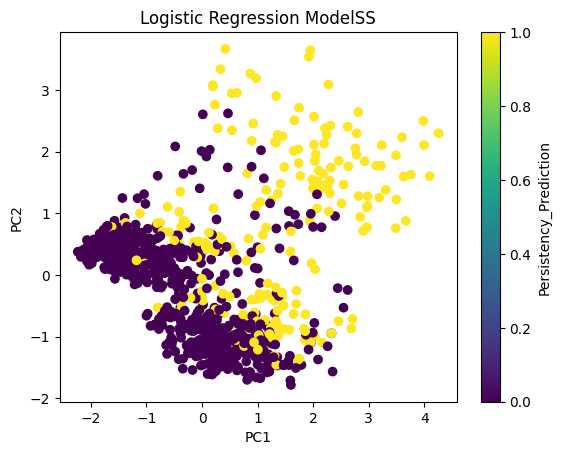

In [ ]:
## visualization of top 2 features in PCA
plt.scatter(x_test_pca[:,0], x_test_pca[:,1], c=y_pred_lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Logistic Regression ModelSS')
plt.colorbar(label='Persistency_Prediction')
plt.show()

In [ ]:
## list my PCA with corresponding feature

# Get the components and explained variance
components = pca.components_

# Map components to original features
feature_names = x_train.columns
component_df = pd.DataFrame(components, columns=feature_names, index=[f'PC{i+1}' for i in range(components.shape[0])])


In [ ]:
# Display the components with corresponding features
print("PCA Components with Corresponding Features:")
component_df.head(5)

#print("\nExplained Variance Ratio:")
#print(explained_variance)

PCA Components with Corresponding Features:


gluco_record_prior_ntm  gluco_record_during_rx  dexa_freq_during_rx  \
PC1                0.055327                0.116786             0.450544   
PC2               -0.002277                0.030479             0.679048   
PC3                0.026067                0.024546            -0.211848   
PC4                0.056366                0.042703            -0.090484   
PC5               -0.061606               -0.108272             0.280435   

     dexa_during_rx  frag_frac_prior_ntm  frag_frac_during_rx  idn_indicator  \
PC1        0.154830             0.034748             0.042239       0.060935   
PC2        0.238544            -0.014492             0.001826       0.012058   
PC3       -0.072680             0.031693             0.025267      -0.001466   
PC4       -0.026519            -0.011602            -0.006606       0.051937   
PC5        0.096023             0.072452             0.009458      -0.071235   

     injectable_experience_during_rx  \
PC1                         0.040824   
PC2                         0.002424   
PC3                        -0.010594   
PC4                         0.004956   
PC5                        -0.034620   

     comorb_encounter_for_screening_for_malignant_neoplasms  \
PC1                                           0.076426        
PC2                                           0.098540        
PC3                                          -0.052507        
PC4                                          -0.040311        
PC5                                          -0.117838        

     comorb_encounter_for_immunization  \
PC1                           0.108242   
PC2                           0.069795   
PC3                           0.015314   
PC4                          -0.107524   
PC5                          -0.112024   

     comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx  \
PC1                                           0.067822                 
PC2                                           0.091476                 
PC3                                          -0.024953                 
PC4                                          -0.090978                 
PC5                                          -0.070077                 

     comorb_vitamin_d_deficiency  \
PC1                     0.122711   
PC2                    -0.015861   
PC3                     0.123408   
PC4                    -0.002942   
PC5                    -0.027674   

     comorb_other_joint_disorder_not_elsewhere_classified  \
PC1                                           0.110785      
PC2                                           0.028912      
PC3                                           0.024967      
PC4                                          -0.017629      
PC5                                          -0.077208      

     comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx  \
PC1                                           0.055461                    
PC2                                           0.034592                    
PC3                                          -0.024194                    
PC4                                          -0.000912                    
PC5                                          -0.040762                    

     comorb_long_term_current_drug_therapy  comorb_dorsalgia  \
PC1                               0.123378          0.082536   
PC2                               0.072730          0.022274   
PC3                               0.023308          0.023590   
PC4                               0.035643         -0.031641   
PC5                              -0.054897         -0.065133   

     comorb_personal_history_of_other_diseases_and_conditions  \
PC1                                           0.060182          
PC2                                           0.025708          
PC3                                           0.022079          
PC4                                           0.003968          
PC5             

Evaluate feature relevance:

Look at the absolute values of the component loadings. Features with smaller absolute values are less important.
Consider the contributions to the first few principal components, as they explain the most variance in the data.
For example, if Feature10 has consistently low loadings across the principal components, it might be less relevant.

To automate this analysis, you can create a summary of the average absolute loadings for each feature across the principal components:

In [ ]:
# Calculate the average absolute loading for each feature
average_abs_loading = component_df.abs().mean()

# Sort features by average absolute loading in ascending order
sorted_features = average_abs_loading.sort_values( ascending= False)

print("\nFeatures sorted by average absolute loading:")
print(sorted_features)



Features sorted by average absolute loading:
risk_smoking_tobacco                        6.507985e-02
change_risk_segment_No change               6.279370e-02
frag_frac_during_rx                         6.225174e-02
frag_frac_prior_ntm                         6.217633e-02
tscore_bucket_during_rx_>-2.5               6.204975e-02
                                                ...     
risk_estrogen_deficiency                    6.274918e-17
ntm_speciality_CLINICAL NURSE SPECIALIST    5.392620e-17
ntm_speciality_OPHTHALMOLOGY                1.915291e-17
ntm_speciality_RADIOLOGY                    9.240695e-18
Aggregate_Risk_Score                        0.000000e+00
Length: 116, dtype: float64


So my top 5 features are:


* risk_smoking_tobacco                        *6.507985e-02*
* change_risk_segment_No change              * 6.279370e-02*
* frag_frac_during_rx                         *6.225174e-02*
* frag_frac_prior_ntm                         *6.217633e-02*
* tscore_bucket_during_rx_>-2.5               *6.204975e-02*

# **Base model**

Select your base model and then explore 1 model of each family if its classification problem then 1 model for Linear models, 1- Model for Ensemble, 1-Model for boosting and other models if you have time (like stacking)

In [ ]:


def evaluation_metrics(y_test, y_pred):
    # Printing basic metrics
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision :", precision_score(y_test, y_pred))
    print("Recall :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))

    # Printing the full classification report
    print(classification_report(y_test, y_pred, target_names=["Non-Persistent", "Persistent"]))

    # Calculating and printing AUC-ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    print("AUC :", auc)

    # Plotting the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label="AUC={:.3f}".format(auc))
    plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc=4)
    plt.show()

    # Plotting the confusion matrix
    matrix = confusion_matrix(y_test, y_pred)
    cm = pd.DataFrame(matrix, index=["Actual Positive (1)", "Actual Negative (0)"], columns=["Predicted Positive (1)", "Predicted Negative (0)"])

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", cbar=False)

    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Values")

    plt.tight_layout()
    plt.show()


In [ ]:
# Splitting the data into training and testing sets before calling the training function
X = df2.drop('persistency_flag', axis=1)
y = df2['persistency_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

In [ ]:
def LogRegModel(X_train, X_test, y_train, y_test):
    # Initialize and train the Logistic Regression model
    logreg = LogisticRegression(random_state=RANDOM_STATE,max_iter=200)
    logreg.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = logreg.predict(X_test)

    # Evaluate the model
    evaluation_metrics(y_test, y_pred)

    return logreg

Accuracy : 0.8203389830508474
Precision : 0.7801418439716312
Recall : 0.5945945945945946
F1 Score : 0.6748466257668712
                precision    recall  f1-score   support

Non-Persistent       0.83      0.92      0.88       405
    Persistent       0.78      0.59      0.67       185

      accuracy                           0.82       590
     macro avg       0.81      0.76      0.78       590
  weighted avg       0.82      0.82      0.81       590

AUC : 0.7590256923590258


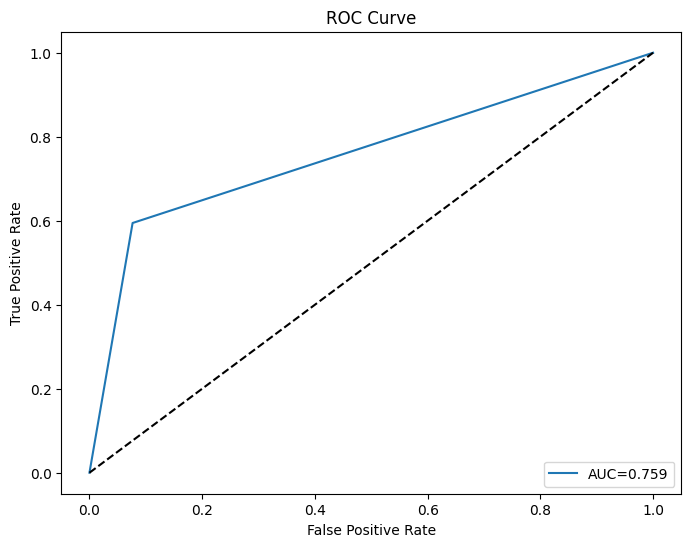

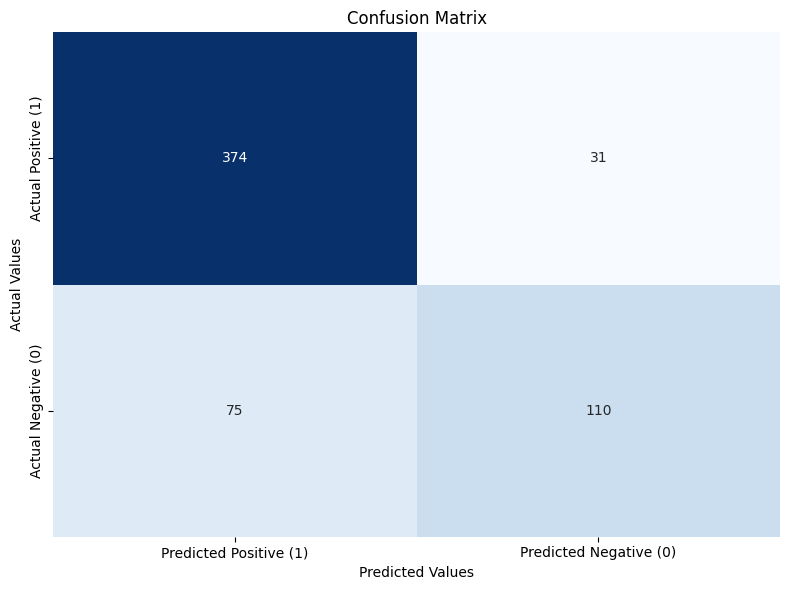

In [ ]:
# Train the model and evaluate it
logistic_model = LogRegModel(X_train, X_test, y_train, y_test)

## **Boosting Models**

In [ ]:
df2.head()

persistency_flag  gluco_record_prior_ntm  gluco_record_during_rx  \
0                 1                       0                       0   
1                 0                       0                       0   
2                 0                       0                       0   
3                 0                       0                       1   
4                 0                       1                       1   

   dexa_freq_during_rx  dexa_during_rx  frag_frac_prior_ntm  \
0             -0.40955               0                    0   
1             -0.40955               0                    0   
2             -0.40955               0                    0   
3             -0.40955               0                    0   
4             -0.40955               0                    0   

   frag_frac_during_rx  idn_indicator  injectable_experience_during_rx  \
0                    0              0                                1   
1                    0              0                                1   
2                    0              0                                1   
3                    0              0                                1   
4                    0              0                                1   

   comorb_encounter_for_screening_for_malignant_neoplasms  \
0                                                  0        
1                                                  0        
2                                                  1        
3                                                  0        
4                                                  1        

   comorb_encounter_for_immunization  \
0                                  1   
1                                  0   
2                                  0   
3                                  1   
4                                  1   

   comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx  \
0                                                  1                 
1                                                  1                 
2                                                  1                 
3                                                  1                 
4                                                  1                 

   comorb_vitamin_d_deficiency  \
0                            0   
1                            0   
2                            0   
3                            0   
4                            0   

   comorb_other_joint_disorder_not_elsewhere_classified  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  1      
4                                                  0      

   comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx  \
0                                                  1                    
1                                                  0                    
2                                                  0                    
3                                                  0                    
4                                                  0                    

   comorb_long_term_current_drug_therapy  comorb_dorsalgia  \
0                                      0                 1   
1                                      0                 0   
2                                      0                 0   
3                                      0                 1   
4                                      0                 1   

   comorb_personal_history_of_other_diseases_and_conditions  \
0                                                  1          
1                                                  0          
2                                                  0          
3                                                  0          
4                                   

In [ ]:
print(list(df2.columns))

['persistency_flag', 'gluco_record_prior_ntm', 'gluco_record_during_rx', 'dexa_freq_during_rx', 'dexa_during_rx', 'frag_frac_prior_ntm', 'frag_frac_during_rx', 'idn_indicator', 'injectable_experience_during_rx', 'comorb_encounter_for_screening_for_malignant_neoplasms', 'comorb_encounter_for_immunization', 'comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx', 'comorb_vitamin_d_deficiency', 'comorb_other_joint_disorder_not_elsewhere_classified', 'comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx', 'comorb_long_term_current_drug_therapy', 'comorb_dorsalgia', 'comorb_personal_history_of_other_diseases_and_conditions', 'comorb_other_disorders_of_bone_density_and_structure', 'comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias', 'comorb_osteoporosis_without_current_pathological_fracture', 'comorb_personal_history_of_malignant_neoplasm', 'comorb_gastro_esophageal_reflux_disease', 'concom_cholesterol_and_triglyceride_regulating_preparations', 'concom_n

In [ ]:
print(df2.isna().sum())

persistency_flag                 0
gluco_record_prior_ntm           0
gluco_record_during_rx           0
dexa_freq_during_rx              0
dexa_during_rx                   0
                                ..
change_risk_segment_No change    0
change_risk_segment_Unknown      0
change_risk_segment_Worsened     0
adherent_flag_Non-Adherent       0
Aggregate_Risk_Score             0
Length: 117, dtype: int64


In [ ]:
# Function to clean column names
def clean_column_names(df):
    # Remove special characters and convert to lowercase
    df.columns = [col.replace('<', 'lt').replace('>', 'gt').replace('&', 'and').replace('/','or').lower() for col in df.columns]

    # Check for empty column names
    if '' in df.columns:
        raise ValueError("Some columns have empty names. Please rename them appropriately.")

    # Check for duplicate column names
    if len(df.columns) != len(set(df.columns)):
        raise ValueError("Some columns have duplicate names. Please ensure all column names are unique.")

    return df

# Clean column names in the DataFrame
df2 = clean_column_names(df2)

# Check the cleaned column names
print(df2.columns)

Index(['persistency_flag', 'gluco_record_prior_ntm', 'gluco_record_during_rx',
       'dexa_freq_during_rx', 'dexa_during_rx', 'frag_frac_prior_ntm',
       'frag_frac_during_rx', 'idn_indicator',
       'injectable_experience_during_rx',
       'comorb_encounter_for_screening_for_malignant_neoplasms',
       ...
       'tscore_bucket_during_rx_gt-2.5', 'tscore_bucket_during_rx_unknown',
       'change_t_score_no change', 'change_t_score_unknown',
       'change_t_score_worsened', 'change_risk_segment_no change',
       'change_risk_segment_unknown', 'change_risk_segment_worsened',
       'adherent_flag_non-adherent', 'aggregate_risk_score'],
      dtype='object', length=117)


In [ ]:
# Splitting the data into training and testing sets before calling the training function
X = df2.drop('persistency_flag', axis=1)
y = df2['persistency_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

In [ ]:


def XGBOOST(X_train, X_test, y_train, y_test):
    # Define the parameter grid to search for best parameters
    param_grid = {
        'max_depth': [2,3],  # Tree depth to test
        'learning_rate': [0.01, 0.1],  # Learning rates to test
        'n_estimators': [190,200],  # Number of trees to test
        'scale_pos_weight': [np.sum(y_train == 0) / np.sum(y_train == 1)] #sum(y_train == 0) / sum(y_train == 1)]
    }

    # Initialize XGBoost classifier
    xgb_model = XGBClassifier(objective='binary:logistic', random_state=RANDOM_STATE)

    # Setup GridSearchCV
    grid = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='roc_auc', cv=3, verbose=1)

    # Fit GridSearchCV to find the best parameters
    grid.fit(X_train, y_train)

    # Print the best parameters and the best score
    print("Best parameters found: ", grid.best_params_)
    print("Best score: ", grid.best_score_)

    # Use the best estimator to make predictions
    y_pred = grid.best_estimator_.predict(X_test)


    # Ensure the evaluation_metrics function is defined in your code
    evaluation_metrics(y_test, y_pred)

    # Return the best model
    return grid.best_estimator_,  grid.best_params_


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 190, 'scale_pos_weight': 2.286908077994429}
Best score:  0.8588835897237951
Accuracy : 0.8084745762711865
Precision : 0.6730769230769231
Recall : 0.7567567567567568
F1 Score : 0.712468193384224
                precision    recall  f1-score   support

Non-Persistent       0.88      0.83      0.86       405
    Persistent       0.67      0.76      0.71       185

      accuracy                           0.81       590
     macro avg       0.78      0.79      0.78       590
  weighted avg       0.82      0.81      0.81       590

AUC : 0.7944277610944278


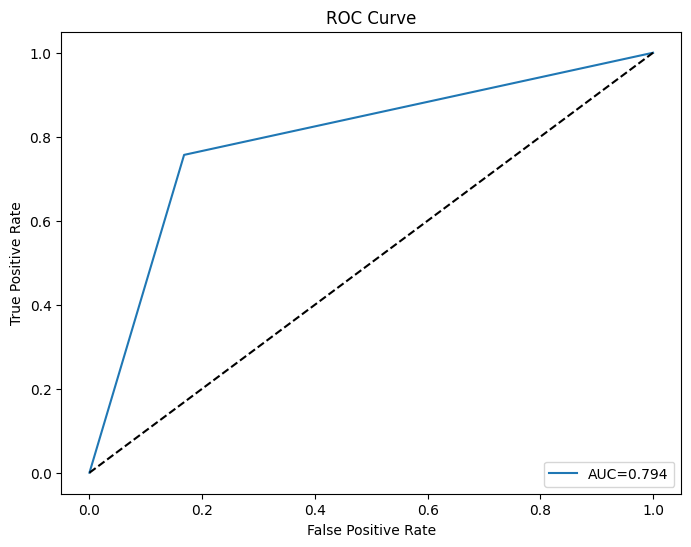

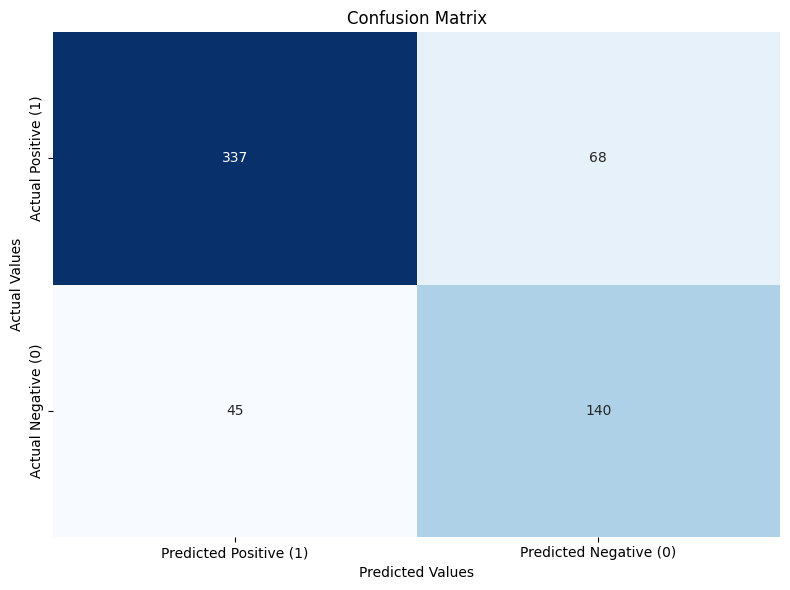

In [ ]:
# Train the model and evaluate it
best_xgb, _ = XGBOOST(X_train, X_test, y_train, y_test)

## **Saving Best Model**

In [ ]:
import pickle
# Save the best XGBoost model to a file
with open('best_xgboost_model.pkl', 'wb') as model_file:
    pickle.dump(best_xgb, model_file)

print("Model saved to 'best_xgboost_model.pkl'")

Model saved to 'best_xgboost_model.pkl'


## **Boosting with PCA**

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters found:  {'xgb__learning_rate': 0.1, 'xgb__max_depth': 2, 'xgb__n_estimators': 190, 'xgb__scale_pos_weight': 2.286908077994429}
Best score:  0.8361045510723741
Accuracy : 0.8033898305084746
Precision : 0.6666666666666666
Recall : 0.745945945945946
F1 Score : 0.7040816326530612
                precision    recall  f1-score   support

Non-Persistent       0.88      0.83      0.85       405
    Persistent       0.67      0.75      0.70       185

      accuracy                           0.80       590
     macro avg       0.77      0.79      0.78       590
  weighted avg       0.81      0.80      0.81       590

AUC : 0.7877877877877877


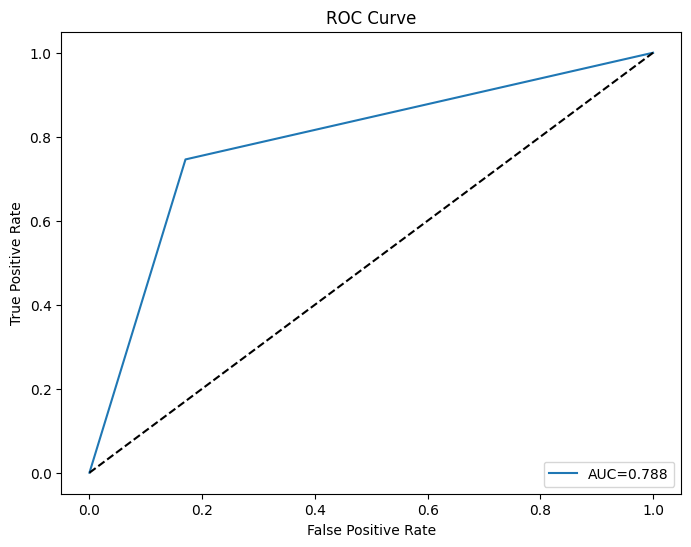

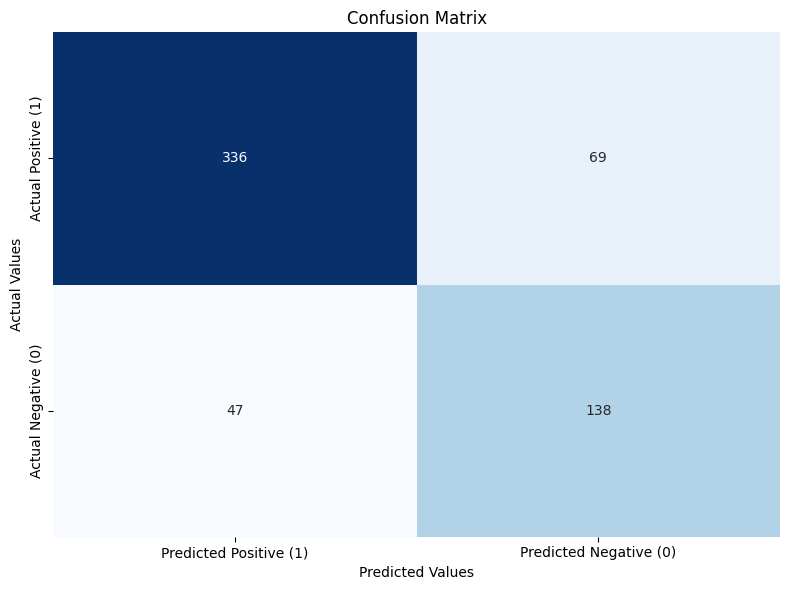

In [ ]:

def XGBOOST(X_train, X_test, y_train, y_test, random_state):
    # Calculate the class balance weight automatically
    scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)

    # Setup a pipeline with PCA and XGBoost classifier
    pipe = Pipeline([
        ('pca', PCA(n_components=0.95)),  # PCA to reduce dimensionality and retain 95% variance
        ('xgb', XGBClassifier(objective='binary:logistic', random_state=random_state))
    ])

    # Define the parameter grid to search for best parameters
    param_grid = {
        'xgb__max_depth': [2, 3],  # Tree depth to test
        'xgb__learning_rate': [0.01, 0.1],  # Learning rates to test
        'xgb__n_estimators': [190, 200],  # Number of trees to test
        'xgb__scale_pos_weight': [scale_pos_weight]  # Balancing class weights
    }

    # Setup GridSearchCV
    grid = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='roc_auc', cv=3, verbose=1)

    # Fit GridSearchCV to find the best parameters
    grid.fit(X_train, y_train)

    # Print the best parameters and the best score
    print("Best parameters found: ", grid.best_params_)
    print("Best score: ", grid.best_score_)

    # Use the best estimator to make predictions
    y_pred = grid.best_estimator_.predict(X_test)

    # Evaluate the model using the evaluation_metrics function
    evaluation_metrics(y_test, y_pred)

    # Return the best model and parameters
    return grid.best_estimator_, grid.best_params_

best_xgb, best_params = XGBOOST(X_train, X_test, y_train, y_test, RANDOM_STATE)


PCA made predictions a bit worse

**Random Forest**

In [ ]:
def RFOREST(X_train, X_test, y_train, y_test):
    # Define the grid of parameters to search for best parameters
    param_grid = {
        'max_depth': [8],  # Depths of the trees to test
        'n_estimators': [180],  # Number of trees in the forest to test
        'min_samples_split': [3, 4],  # Minimum number of samples required to split a node
        'min_samples_leaf': [4,5],  # Minimum number of samples required at a leaf node
        'class_weight':['balanced']   # Balancing class weights
    }

    # Initialize the Random Forest classifier
    rf_model = RandomForestClassifier(random_state=RANDOM_STATE)

    # Setup GridSearchCV to find the best parameters
    grid = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='roc_auc', cv=3, verbose=1)

    # Fit GridSearchCV to find the best parameters
    grid.fit(X_train, y_train)

    # Print the best parameters and best score found
    print("Best parameters found: ", grid.best_params_)
    print("Best score: ", grid.best_score_)

    # Use the best estimator to make predictions
    y_pred = grid.best_estimator_.predict(X_test)

    # Evaluate the model using the predefined evaluation metrics function
    evaluation_metrics(y_test, y_pred)

    # Return the best model
    return grid.best_estimator_, grid.best_params_


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters found:  {'class_weight': 'balanced', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 180}
Best score:  0.8503003856432706
Accuracy : 0.8050847457627118
Precision : 0.6902173913043478
Recall : 0.6864864864864865
F1 Score : 0.6883468834688347
                precision    recall  f1-score   support

Non-Persistent       0.86      0.86      0.86       405
    Persistent       0.69      0.69      0.69       185

      accuracy                           0.81       590
     macro avg       0.77      0.77      0.77       590
  weighted avg       0.80      0.81      0.80       590

AUC : 0.772872872872873


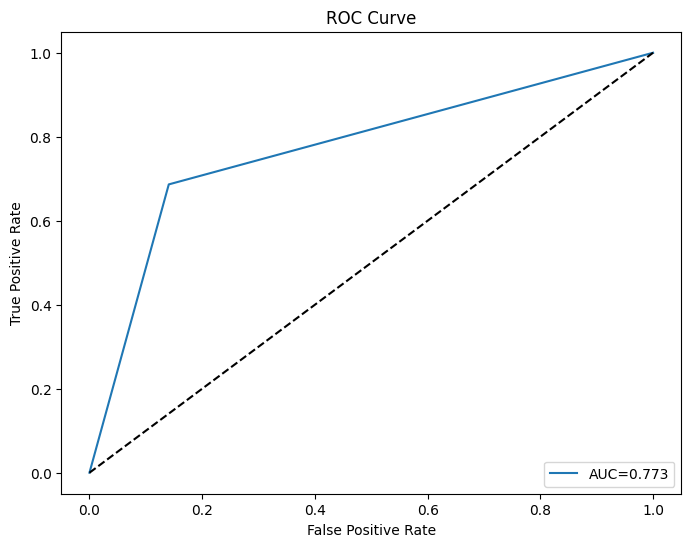

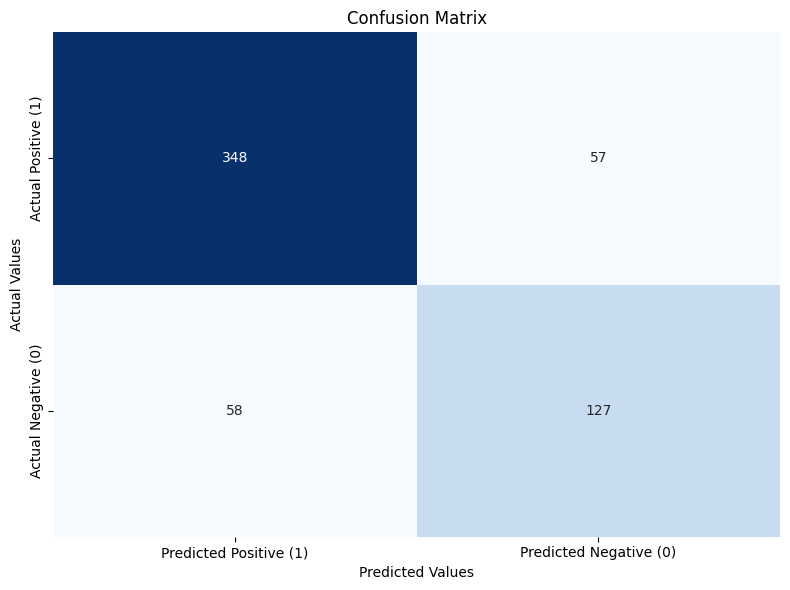

In [ ]:
# Train the model and evaluate it
best_rf, _ = RFOREST(X_train, X_test, y_train, y_test)

## **Stacking Classifier**

In [ ]:
def STACKING(X_train, X_test, y_train, y_test, best_rf, best_xgb, random_state=RANDOM_STATE):

    # Use the pre-trained models as base estimators
    estimators = [
        ('rf', best_rf),
        ('xgb', best_xgb)
    ]

    # Create the Stacking Classifier with a Logistic Regression meta-classifier
    stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)

    # Fit the Stacking Classifier only with the training data
    stacking_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = stacking_model.predict(X_test)

    # Evaluate the model
    evaluation_metrics(y_test, y_pred)

    # Return the trained stacking model
    return stacking_model



Accuracy : 0.8067796610169492
Precision : 0.7448275862068966
Recall : 0.5837837837837838
F1 Score : 0.6545454545454547
                precision    recall  f1-score   support

Non-Persistent       0.83      0.91      0.87       405
    Persistent       0.74      0.58      0.65       185

      accuracy                           0.81       590
     macro avg       0.79      0.75      0.76       590
  weighted avg       0.80      0.81      0.80       590

AUC : 0.7462128795462128


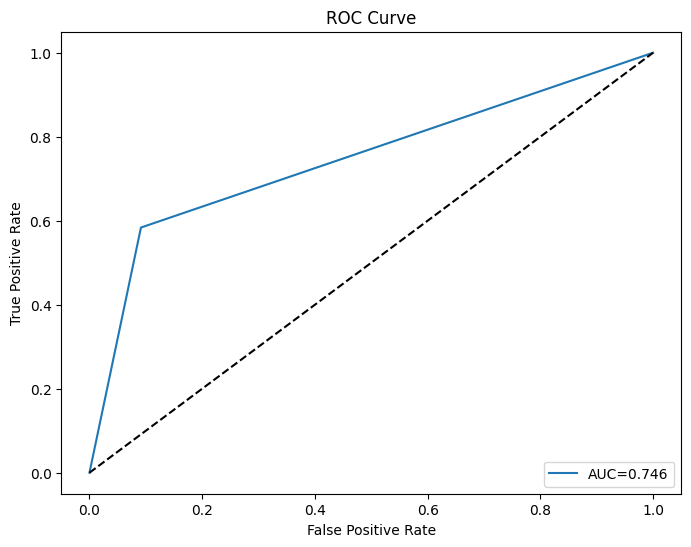

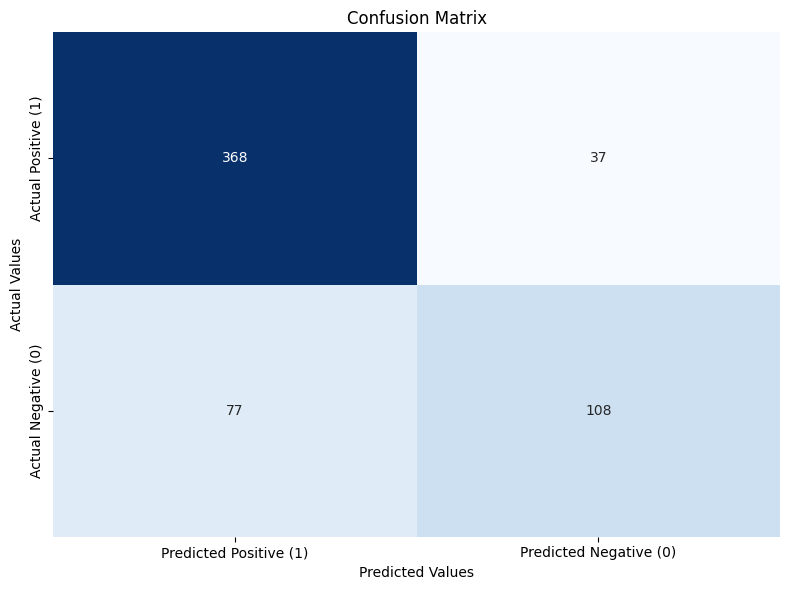

In [ ]:
stacking_model = STACKING(X_train, X_test, y_train, y_test, best_rf, best_xgb, random_state=RANDOM_STATE)

## **Neural Network**

In [ ]:
def MLP(X_train, X_test, y_train, y_test, random_state):

    param_grid = {
        'hidden_layer_sizes': [(100,)],
        'solver': ['lbfgs','sgd', 'adam'],
        'alpha': [0.01, 0.1, 0.001,],
        'learning_rate': ['constant']
    }
    mlp = MLPClassifier(random_state=random_state, max_iter=1000)

    grid = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=10)

    grid.fit(X_train, y_train)

    print("Best parameters found: ", grid.best_params_)
    print("Best score: ", grid.best_score_)


    best_mlp = grid.best_estimator_
    y_pred = best_mlp.predict(X_test)


    evaluation_metrics(y_test, y_pred)


    return best_mlp

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3; 1/9] START alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=lbfgs
[CV 1/3; 1/9] END alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=lbfgs;, score=0.805 total time=   2.2s
[CV 2/3; 1/9] START alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=lbfgs
[CV 2/3; 1/9] END alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=lbfgs;, score=0.769 total time=   2.3s
[CV 3/3; 1/9] START alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=lbfgs
[CV 3/3; 1/9] END alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=lbfgs;, score=0.789 total time=   2.2s
[CV 1/3; 2/9] START alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd
[CV 1/3; 2/9] END alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd;, score=0.874 total time=  10.2s
[CV 2/3; 2/9] START alpha=0.01, hidden_layer_sizes=(

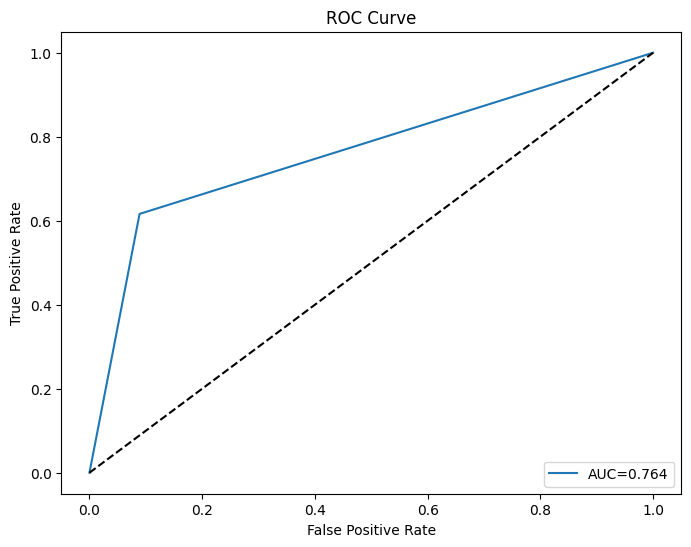

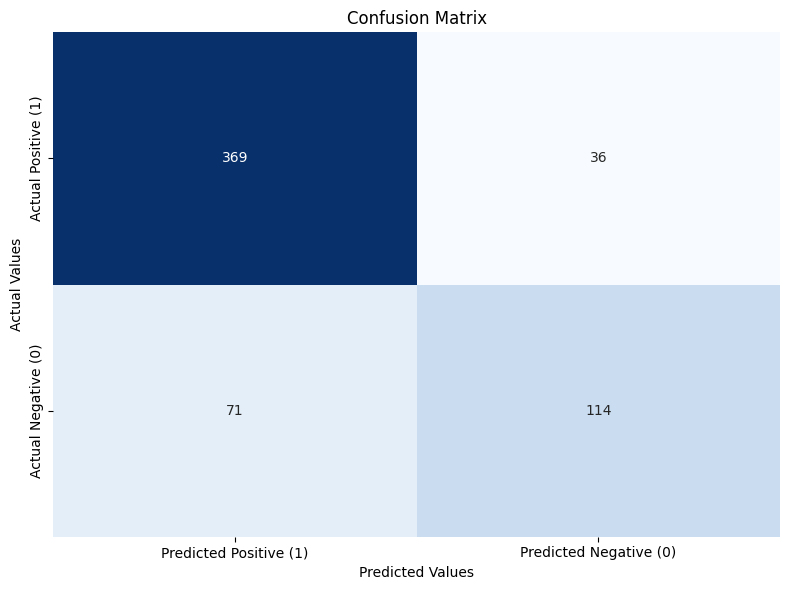

In [ ]:
mlp_model = MLP(X_train, X_test, y_train, y_test, RANDOM_STATE)

# **Conclusion**


Approximately all the classifiers have  almost same result, XGboost without PCA has the bests result:

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 190, 'scale_pos_weight': 2.286908077994429}

Best score:  0.86
Accuracy : 0.81  
Precision : 0.67  
Recall : 0.75  
F1 Score : 0.71
AUC : 0.794

ABC Pharmaceutical is committed to understanding the factors that affect the drug persistency. To facilitate this, a detailed analysis was initiated to develop an automated solution that could accurately predict and enhance drug persistency.
Team Data Minders undertook a thorough exploratory data analysis (EDA) which helped identify key variables influencing drug persistency, highlighted  data imbalances and anomalies,  and underscored the importance of accurate model evaluation metrics due to potential class imbalances in the target variable, "Persistency_Flag."

Model Selection

When selecting models for ABC Pharmaceutical's project, we needed solutions capable of handling class imbalance and complex feature interactions. XGBoost was chosen for its ability to manage large datasets and highlight feature importance, critical for understanding drug persistency factors. The version without PCA preserved the interpretability of individual features. Random Forest was selected for its robustness against overfitting and its effectiveness in modeling non-linear relationships. Logistic Regression provided a straightforward, interpretable baseline for comparison. MLP (Multi-Layer Perceptron) was included to capture complex, non-linear patterns in the data. Stacking was also employed to leverage the strengths of each individual model, combining their predictions to potentially enhance overall accuracy and robustness. Each model incorporated class balancing techniques to ensure fair representation of all classes in predictions, addressing the dataset's inherent imbalances.

Choice of Evaluation Metric:
ROC AUC was chosen as the primary metric to assess model effectiveness because:
It effectively handles class imbalance by measuring the model's ability to discriminate between the classes without being misled by the majority class.
It is threshold-independent, providing a comprehensive measure of model performance across all classification thresholds.
ROC curves were constructed for each model to visually assess their performance in distinguishing between the classes.

Detailed Results:
The XGBoost model without PCA emerged as the superior model, yielding the highest ROC AUC score of 0.794. This indicates its good capability in distinguishing between persistent and non-persistent cases.

Conclusions and Strategic Recommendations:
The analysis confirmed that XGBoost without PCA is ideally suited for operational deployment due to its robust performance across various metrics. This model not only excels at predicting drug persistency but also offers insights into the features most affecting persistency, which can guide more targeted interventions.
